<a href="https://colab.research.google.com/github/sheikh495/Algorithms/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def bellman_ford_with_max_passes(graph, source):
    n = len(graph)  # Number of vertices
    m = float('inf')  # Initialize m with infinity
    k = 0  # Number of passes

    # Find the maximum number of edges needed to construct a shortest path
    for u in graph:
        for v, weight in graph[u]:
            m = min(m, weight)

    distances = {node: float('inf') for node in range(n)}
    distances[source] = 0

    while k <= m:
        changed = False
        for u in graph:
            for v, weight in graph[u]:
                if distances[u] + weight < distances[v]:
                    distances[v] = distances[u] + weight
                    changed = True

        if not changed:
            break

        k += 1

    if k > m:
        return "Negative weight cycle detected"
    else:
        return distances

# Example usage:
graph = {
    0: [(1, 6), (2, 7)],
    1: [(3, 5)],
    2: [(3, 8)],
    3: []
}
source_node = 0
print(bellman_ford_with_max_passes(graph, source_node))


{0: 0, 1: 6, 2: 7, 3: 11}


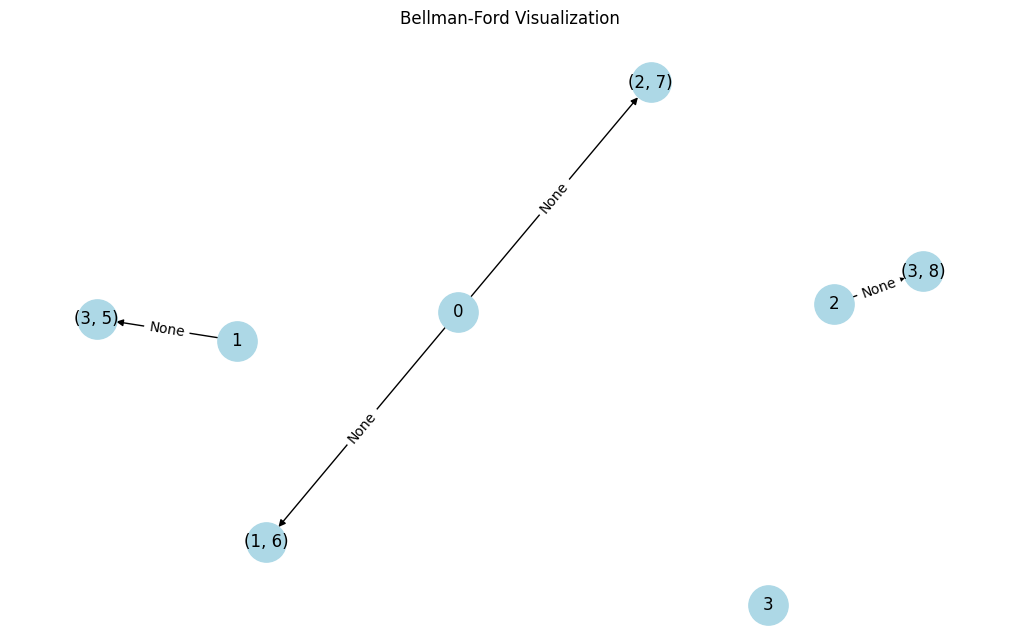

Distances: {0: 0, 1: inf, 2: inf, 3: inf}
Press Enter to continue...2


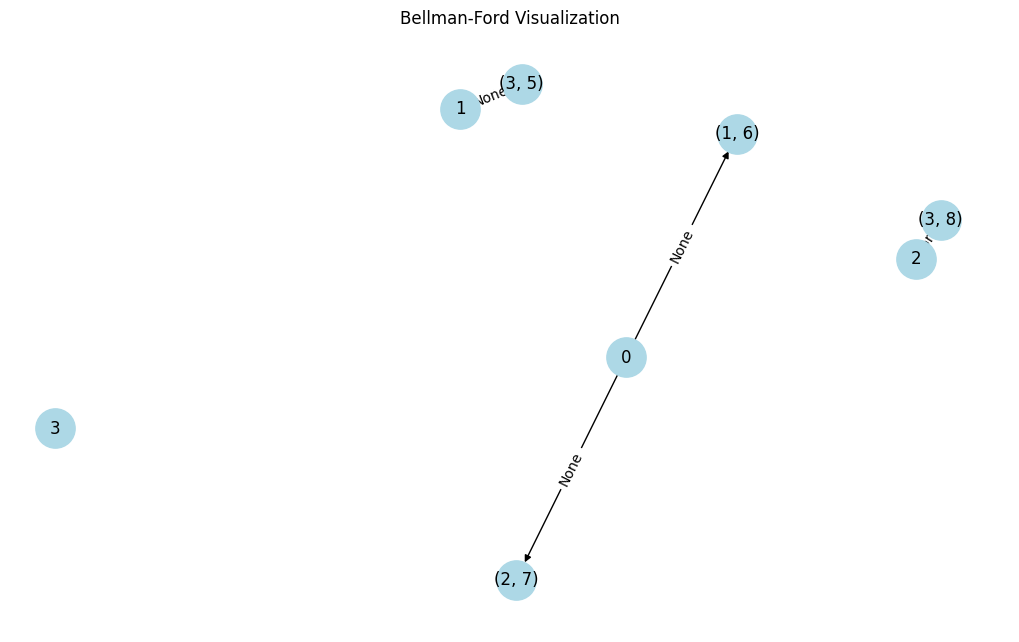

Distances: {0: 0, 1: 6, 2: 7, 3: 11}
Press Enter to continue...3
{0: 0, 1: 6, 2: 7, 3: 11}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def bellman_ford_with_max_passes(graph, source):
    n = len(graph)  # Number of vertices
    m = float('inf')  # Initialize m with infinity
    k = 0  # Number of passes

    # Find the maximum number of edges needed to construct a shortest path
    for u in graph:
        for v, weight in graph[u]:
            m = min(m, weight)

    distances = {node: float('inf') for node in range(n)}
    distances[source] = 0

    # Visualization
    def visualize(graph, distances):
        G = nx.DiGraph(graph)
        pos = nx.spring_layout(G)
        plt.figure(figsize=(10, 6))
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=12)
        nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): str(weight) for u, v, weight in G.edges(data='weight')})
        plt.title('Bellman-Ford Visualization')
        plt.show()
        print("Distances:", distances)
        input("Press Enter to continue...")

    visualize(graph, distances)

    while k <= m:
        changed = False
        for u in graph:
            for v, weight in graph[u]:
                if distances[u] + weight < distances[v]:
                    distances[v] = distances[u] + weight
                    changed = True

        if not changed:
            break

        k += 1

        visualize(graph, distances)

    if k > m:
        return "Negative weight cycle detected"
    else:
        return distances

# Example usage:
graph = {
    0: [(1, 6), (2, 7)],
    1: [(3, 5)],
    2: [(3, 8)],
    3: []
}
source_node = 0
print(bellman_ford_with_max_passes(graph, source_node))


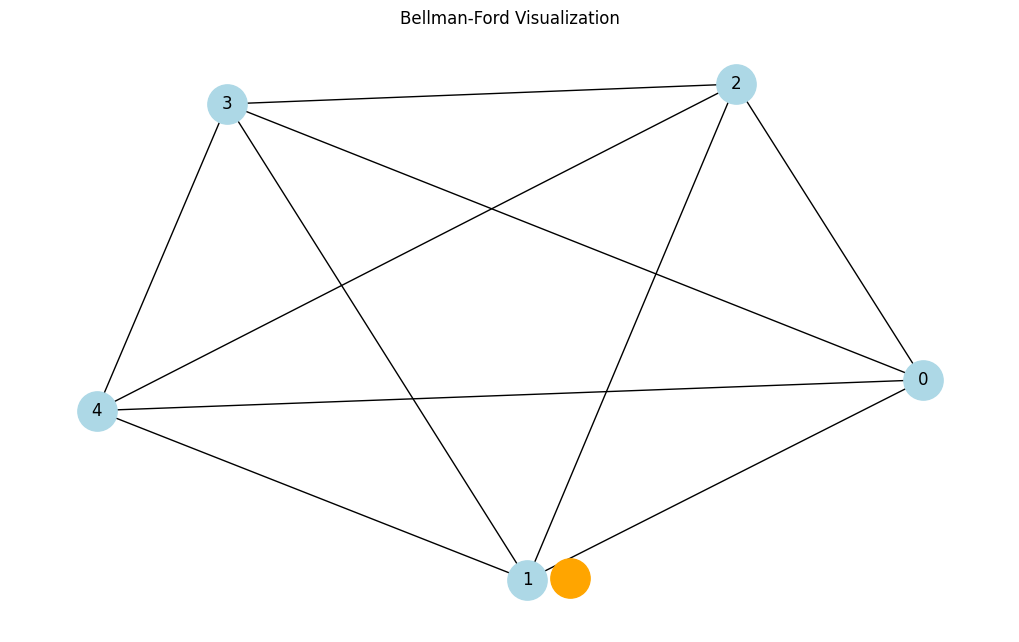

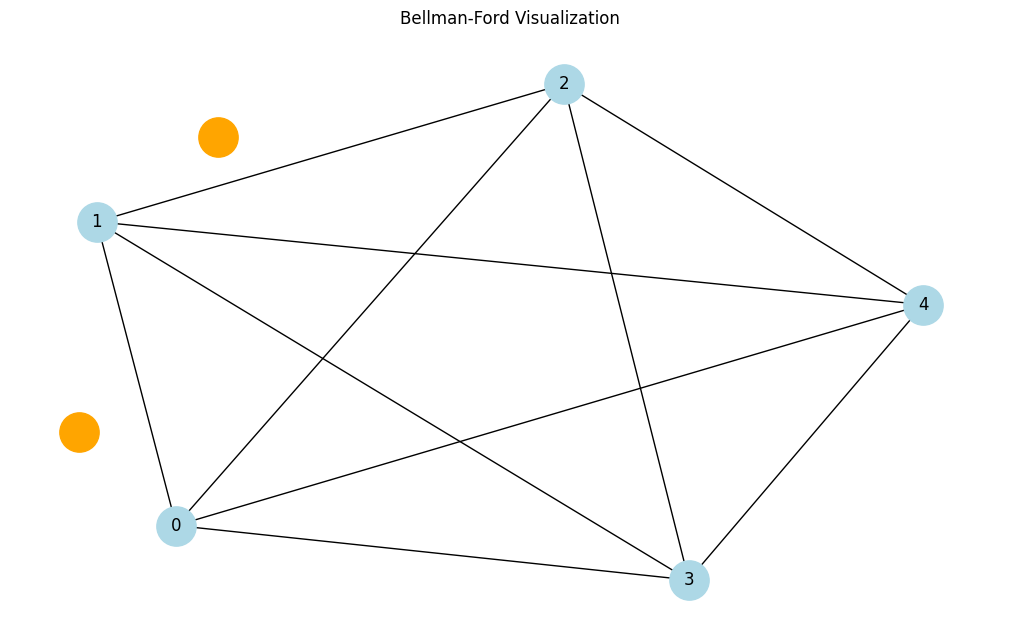

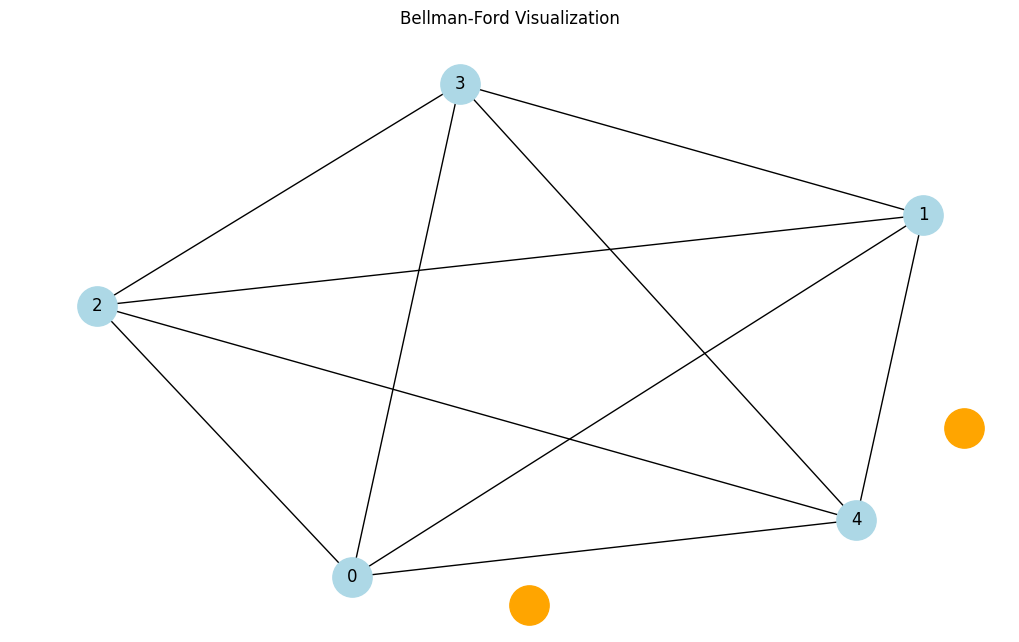

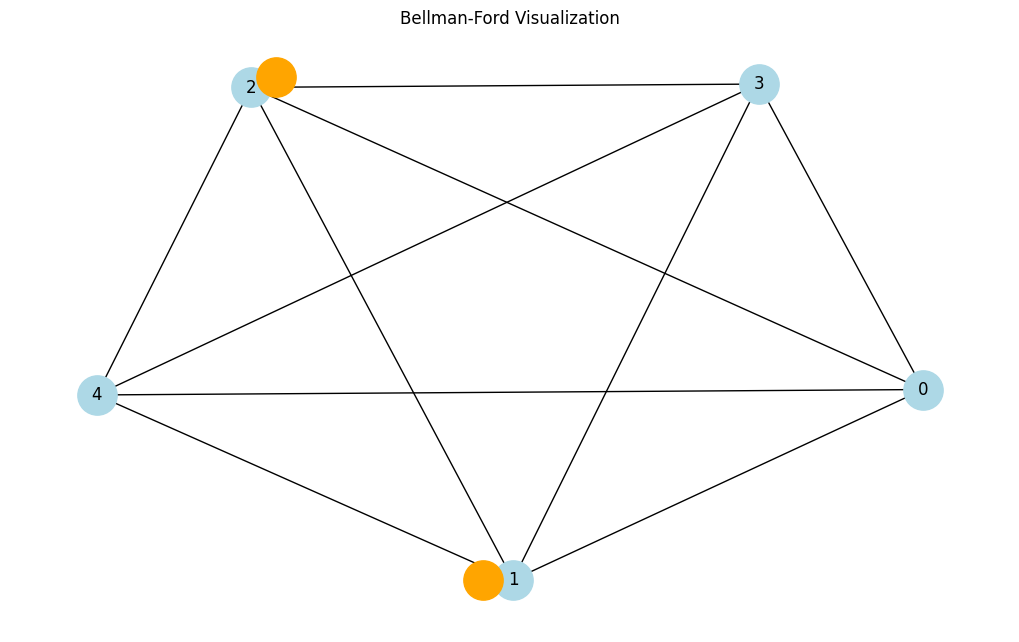

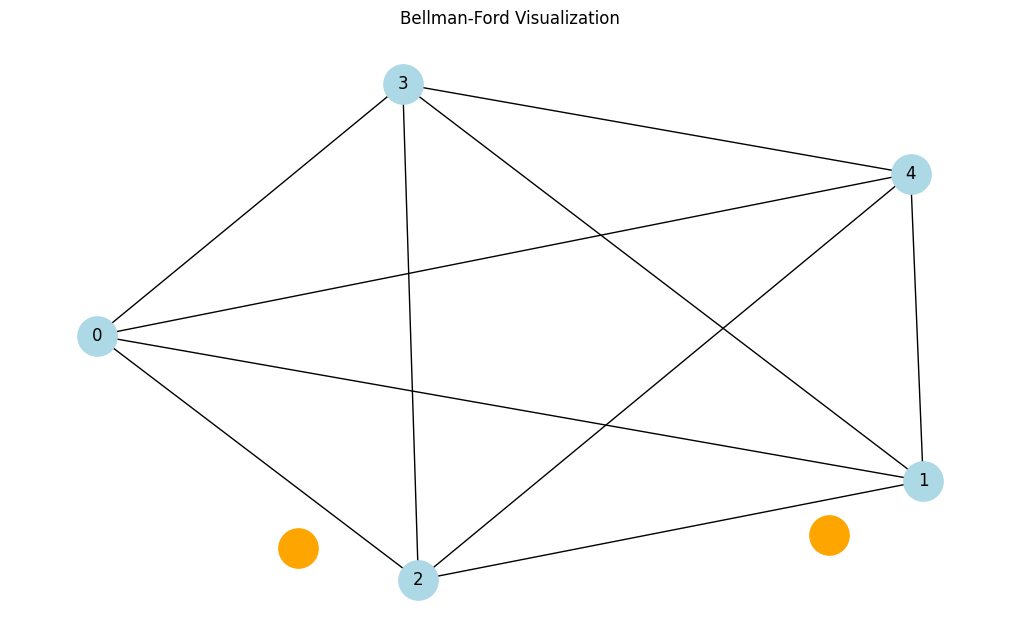

{0: 0, 1: 1, 2: 1, 3: 1, 4: 1}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def bellman_ford(graph, source):
    # Initialize distances array
    distances = {vertex: float('inf') for vertex in graph}
    distances[source] = 0

    # Visualization
    def visualize(graph, distances, highlighted_nodes=None):
        plt.figure(figsize=(10, 6))
        nx.draw(graph, with_labels=True, node_color='lightblue', node_size=800, font_size=12)
        if highlighted_nodes:
            nx.draw_networkx_nodes(graph, pos=nx.spring_layout(graph), nodelist=highlighted_nodes, node_color='orange', node_size=800)
        plt.title('Bellman-Ford Visualization')
        plt.show()

    # Visualization before starting
    visualize(graph, distances, [source])

    # Relax edges repeatedly
    for _ in range(len(graph) - 1):
        for u in graph:
            for v in graph[u]:
                weight = graph[u][v]['weight']
                if distances[u] + weight < distances[v]:
                    distances[v] = distances[u] + weight
                    visualize(graph, distances, [u, v])

    # Check for negative weight cycles
    for u in graph:
        for v in graph[u]:
            weight = graph[u][v]['weight']
            if distances[u] + weight < distances[v]:
                return "Negative weight cycle detected", distances

    return distances

# Create a complete graph with 5 nodes
complete_graph = nx.complete_graph(5)

# Assign random weights to edges
for u, v in complete_graph.edges():
    complete_graph[u][v]['weight'] = 1

# Example usage:
source = 0
print(bellman_ford(complete_graph, source))


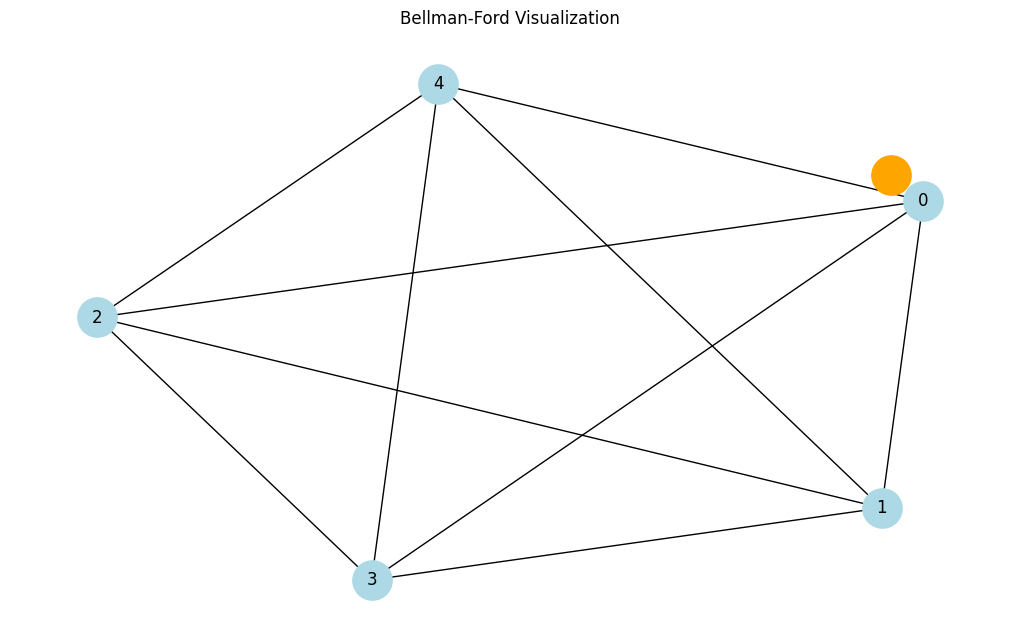

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def bellman_ford(graph, source):
    # Get initial distances from node attributes
    distances = {node: graph.nodes[node]['distance'] for node in graph}

    # Visualization
    def visualize(graph, distances, highlighted_nodes=None):
        plt.figure(figsize=(10, 6))
        nx.draw(graph, with_labels=True, node_color='lightblue', node_size=800, font_size=12)
        if highlighted_nodes:
            nx.draw_networkx_nodes(graph, pos=nx.spring_layout(graph), nodelist=highlighted_nodes, node_color='orange', node_size=800)
        plt.title('Bellman-Ford Visualization')
        plt.show()

    # Visualization before starting
    visualize(graph, distances, [source])

    # Relax edges repeatedly
    for _ in range(len(graph) - 1):
        for u in graph:
            for v in graph[u]:
                weight = graph[u][v]['weight']
                if distances[u] + weight < distances[v]:
                    distances[v] = distances[u] + weight
                    visualize(graph, distances, [u, v])

    # Check for negative weight cycles
    for u in graph:
        for v in graph[u]:
            weight = graph[u][v]['weight']
            if distances[u] + weight < distances[v]:
                return "Negative weight cycle detected", distances

    return distances

# Create a complete graph with 5 nodes
complete_graph = nx.complete_graph(5)

# Assign random weights to edges and distances to nodes
for u, v in complete_graph.edges():
    complete_graph[u][v]['weight'] = 1

# Set distances to each node
nx.set_node_attributes(complete_graph, {node: 0 for node in complete_graph}, name='distance')

# Example usage:
source = 0
print(bellman_ford(complete_graph, source))


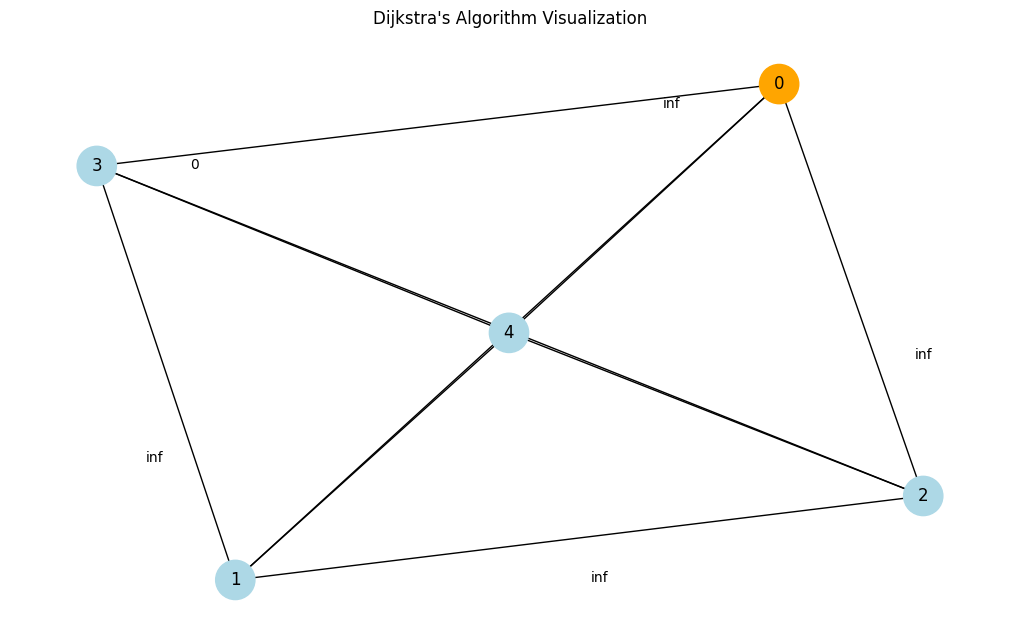

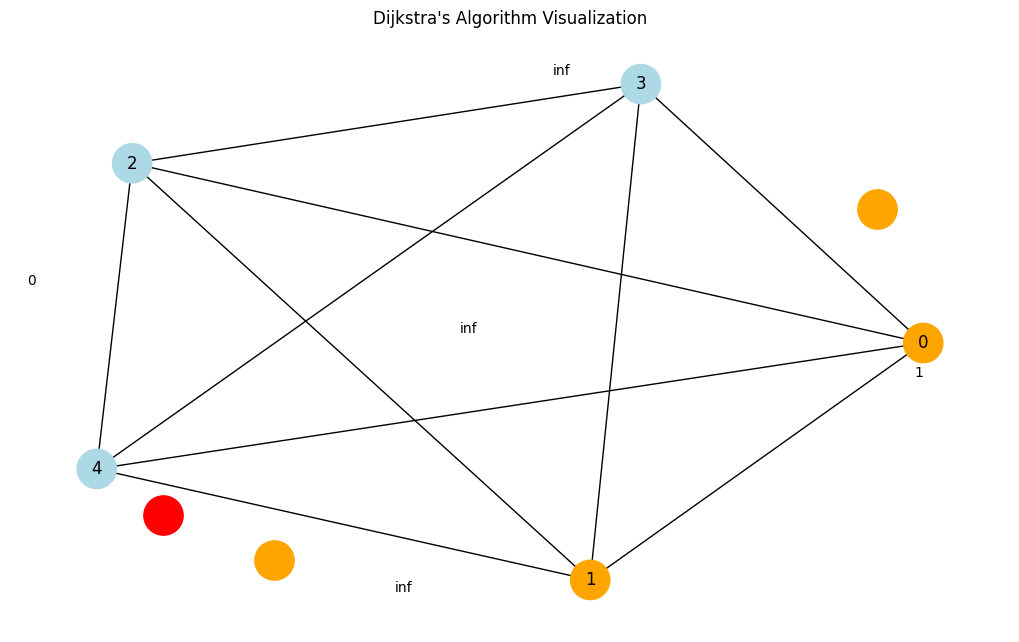

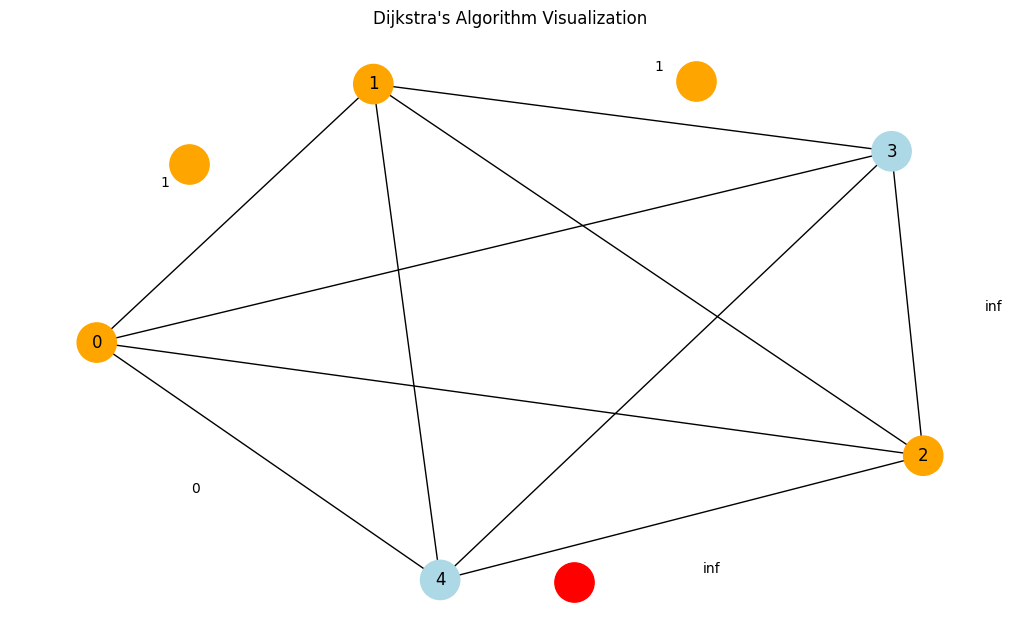

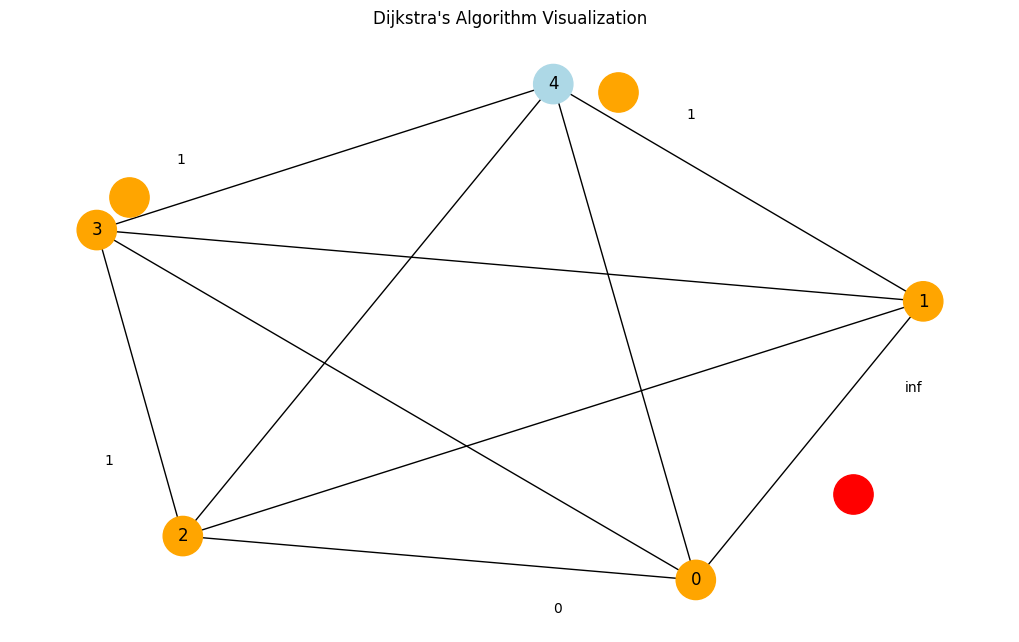

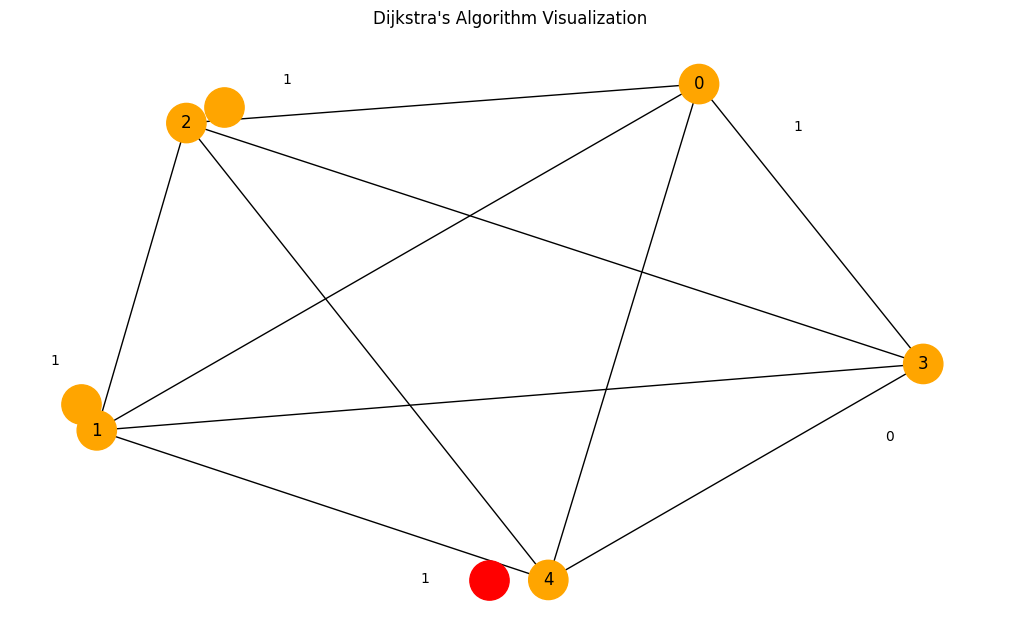

Shortest distances from node 0: {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}
Shortest paths from node 0: {0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 3], 4: [0, 4]}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_shortest_paths(graph, source):
    # Initialize distances array
    distances = {vertex: float('inf') for vertex in graph}
    distances[source] = 0

    # Priority queue to store vertices to be visited
    pq = [(0, source)]  # (distance, vertex)

    # Predecessor array to store predecessor node of each node in shortest paths
    predecessors = {vertex: None for vertex in graph}

    # Create a colors dictionary to keep track of node colors
    colors = {node: 'lightblue' for node in graph}
    colors[source] = 'orange'  # Color source node orange

    # Visualization function
    def visualize(graph, colors, distances, predecessors, current_node, visited_nodes=None, shortest_path=None):
        plt.figure(figsize=(10, 6))
        nx.draw(graph, with_labels=True, node_color=[colors[node] for node in graph.nodes()], node_size=800, font_size=12)
        nx.draw_networkx_labels(graph, pos=nx.spring_layout(graph), labels=distances, font_color='black', font_size=10)
        if visited_nodes:
            nx.draw_networkx_nodes(graph, pos=nx.spring_layout(graph), nodelist=visited_nodes, node_color='orange', node_size=800)
        if shortest_path:
            nx.draw_networkx_edges(graph, pos=nx.spring_layout(graph), edgelist=shortest_path, edge_color='red', width=2)
        if current_node:
            nx.draw_networkx_nodes(graph, pos=nx.spring_layout(graph), nodelist=[current_node], node_color='red', node_size=800)
        plt.title('Dijkstra\'s Algorithm Visualization')
        plt.show()

    # Visualization before starting
    visualize(graph, colors, distances, predecessors, source)

    # While priority queue is not empty
    while pq:
        # Pop vertex with smallest distance
        dist_u, u = pq.pop(0)

        # Iterate over neighbors of u
        for v in graph[u]:
            # Calculate distance to v via u
            dist_v_via_u = dist_u + graph[u][v]['weight']

            # Update distance to v if shorter path found
            if dist_v_via_u < distances[v]:
                distances[v] = dist_v_via_u
                pq.append((dist_v_via_u, v))
                pq.sort()  # Re-sort the priority queue
                colors[v] = 'orange'  # Color visited node orange
                predecessors[v] = u  # Update predecessor of v
                visualize(graph, colors, distances, predecessors, v, [u, v])  # Visualize the edge that caused the update

    # Find shortest paths by following predecessor nodes
    shortest_paths = {}
    for target_node in graph:
        path = []
        current_node = target_node
        while current_node is not None:
            path.append(current_node)
            current_node = predecessors[current_node]
        shortest_paths[target_node] = list(reversed(path))

    return distances, shortest_paths

# Create a complete graph with 5 nodes
complete_graph = nx.complete_graph(5)

# Assign random weights to edges
for u, v in complete_graph.edges():
    complete_graph[u][v]['weight'] = 1

# Example usage:
source_node = 0
shortest_distances, shortest_paths = dijkstra_shortest_paths(complete_graph, source_node)
print("Shortest distances from node 0:", shortest_distances)
print("Shortest paths from node 0:", shortest_paths)


In [ ]:
def equivalent_undirected_graph(V, Adj):
    Adj_prime = [[] for _ in range(len(V))]
    A = [0] * len(V)

    for u in range(len(V)):
        for v in Adj[u]:
            if v != u and A[v] != u:
                A[v] = u
                Adj_prime[u].append(v)
                Adj_prime[v].append(u)  # Adding the reverse edge for undirected graph

    return Adj_prime

# Example usage
V = [0, 1, 2, 3]
Adj = [[1, 3], [0, 2], [1], [0]]
equivalent_graph = equivalent_undirected_graph(V, Adj)
print(equivalent_graph)


[[1, 3], [0, 2, 2], [1, 1], [0]]


In [ ]:
def equivalent_undirected_graph(V, Adj):
    Adj_prime = [[] for _ in range(len(V))]
    A = [0] * len(V)

    for u in range(len(V)):
        for v in Adj[u]:
            if v != u and A[v] != u:
                A[v] = u
                Adj_prime[u].append(v)
                Adj_prime[v].append(u)  # Adding the reverse edge for undirected graph

    return Adj_prime

def dfs(node, visited, graph):
    if not visited[node]:
        visited[node] = True
        print(node, end=' ')
        for neighbor in graph[node]:
            dfs(neighbor, visited, graph)

# Example usage
V = [0, 1, 2, 3]
Adj = [[1, 3], [0, 2], [1], [0]]
equivalent_graph = equivalent_undirected_graph(V, Adj)

print("Original Graph:")
for i in range(len(V)):
    print(f"Vertex {i}: {Adj[i]}")

print("\nEquivalent Undirected Graph:")
for i in range(len(V)):
    print(f"Vertex {i}: {equivalent_graph[i]}")

# Visualizing the created graph using DFS
print("\nDFS traversal of the created graph:")
visited = [False] * len(V)
for i in range(len(V)):
    if not visited[i]:
        dfs(i, visited, equivalent_graph)


Original Graph:
Vertex 0: [1, 3]
Vertex 1: [0, 2]
Vertex 2: [1]
Vertex 3: [0]

Equivalent Undirected Graph:
Vertex 0: [1, 3]
Vertex 1: [0, 2, 2]
Vertex 2: [1, 1]
Vertex 3: [0]

DFS traversal of the created graph:
0 1 2 3 

In [ ]:
def equivalent_undirected_graph(V, Adj):
    Adj_prime = [[] for _ in range(len(V))]
    A = [0] * len(V)

    for u in range(len(V)):
        for v in Adj[u]:
            if v != u and A[v] != u:
                A[v] = u
                Adj_prime[u].append(v)
                Adj_prime[v].append(u)  # Adding the reverse edge for undirected graph

    return Adj_prime

def dfs(node, visited, graph):
    if not visited[node]:
        visited[node] = True
        print("  " * node, node, end=' ')
        print("(Visited)")
        for neighbor in graph[node]:
            dfs(neighbor, visited, graph)

# Example usage
V = [0, 1, 2, 3]
Adj = [[1, 3], [0, 2], [1], [0]]
equivalent_graph = equivalent_undirected_graph(V, Adj)

print("Equivalent Undirected Graph:")

# Visualizing the created graph using DFS
visited = [False] * len(V)
for i in range(len(V)):
    if not visited[i]:
        print("Vertex:", i)
        dfs(i, visited, equivalent_graph)


Equivalent Undirected Graph:
Vertex: 0
 0 (Visited)
   1 (Visited)
     2 (Visited)
       3 (Visited)


In [ ]:
def complete_graph(n):
    Adj = [[] for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            Adj[i].append(j)
            Adj[j].append(i)
    return Adj

# Example usage
n = 5
complete_adjacency = complete_graph(n)
for i in range(n):
    print(f"Vertex {i}: {complete_adjacency[i]}")


Vertex 0: [1, 2, 3, 4]
Vertex 1: [0, 2, 3, 4]
Vertex 2: [0, 1, 3, 4]
Vertex 3: [0, 1, 2, 4]
Vertex 4: [0, 1, 2, 3]


In [ ]:
pip install networkx


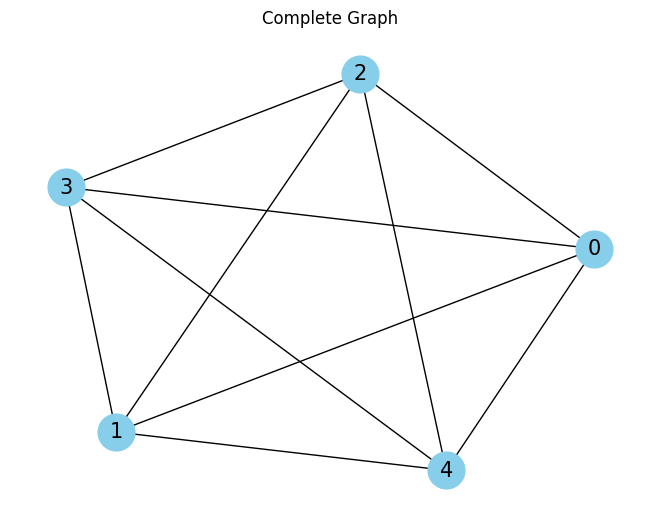

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def complete_graph(n):
    G = nx.Graph()
    for i in range(n):
        for j in range(i + 1, n):
            G.add_edge(i, j)
    return G

# Example usage
n = 5
complete_graph = complete_graph(n)

# Visualize the graph
pos = nx.spring_layout(complete_graph)  # positions for all nodes
nx.draw(complete_graph, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', linewidths=1, font_size=15)
plt.title("Complete Graph")
plt.show()


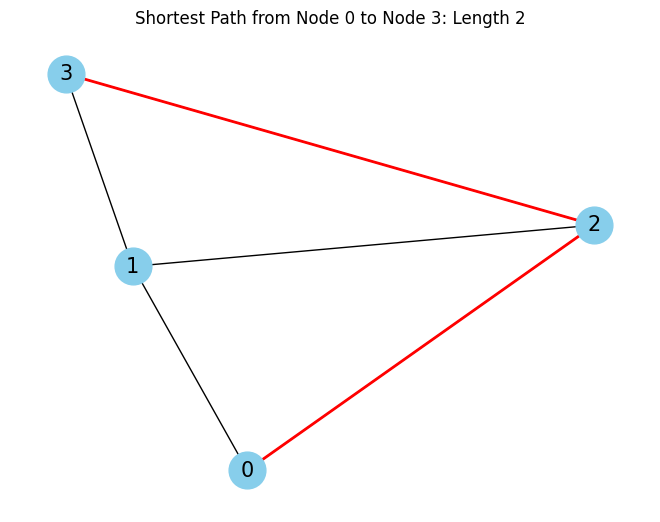

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define a function to create a graph
def create_graph():
    G = nx.Graph()
    G.add_edge(0, 1, weight=4)
    G.add_edge(0, 2, weight=1)
    G.add_edge(1, 2, weight=2)
    G.add_edge(1, 3, weight=5)
    G.add_edge(2, 3, weight=1)
    return G

# Define a function to find the shortest path
def shortest_path(graph, source, target):
    path = nx.dijkstra_path(graph, source=source, target=target)
    length = nx.dijkstra_path_length(graph, source=source, target=target)
    return path, length

# Create a graph
G = create_graph()

# Find the shortest path from node 0 to node 3
source = 0
target = 3
shortest_path, length = shortest_path(G, source, target)

# Visualize the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', linewidths=1, font_size=15)
# Highlight the shortest path
edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color='r')
plt.title("Shortest Path from Node {} to Node {}: Length {}".format(source, target, length))
plt.show()


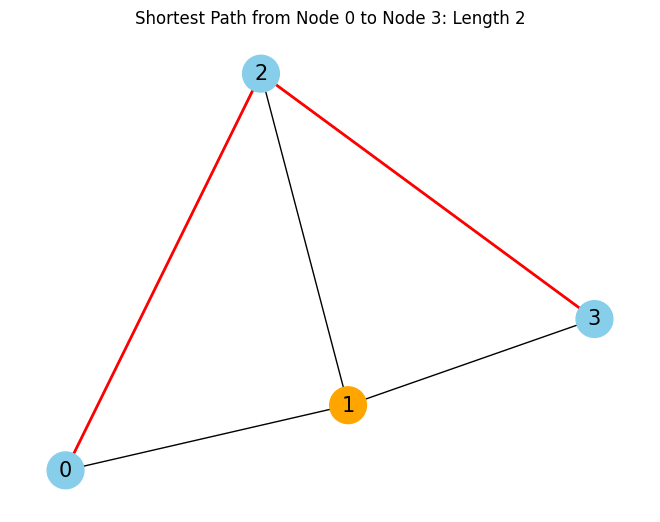

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define a function to create a graph
def create_graph():
    G = nx.Graph()
    G.add_edge(0, 1, weight=4)
    G.add_edge(0, 2, weight=1)
    G.add_edge(1, 2, weight=2)
    G.add_edge(1, 3, weight=5)
    G.add_edge(2, 3, weight=1)
    return G

# Define a function to find the shortest path
def shortest_path(graph, source, target):
    path = nx.dijkstra_path(graph, source=source, target=target)
    length = nx.dijkstra_path_length(graph, source=source, target=target)
    return path, length

# Create a graph
G = create_graph()

# Find the shortest path from node 0 to node 3
source = 0
target = 3
shortest_path, length = shortest_path(G, source, target)

# Get all nodes except the source and target
other_nodes = set(G.nodes()) - set([source, target])

# Visualize the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Assign colors to nodes
node_colors = ['skyblue' if node in shortest_path else 'orange' for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, edge_color='k', linewidths=1, font_size=15)
# Highlight the shortest path
edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color='r')
plt.title("Shortest Path from Node {} to Node {}: Length {}".format(source, target, length))
plt.show()


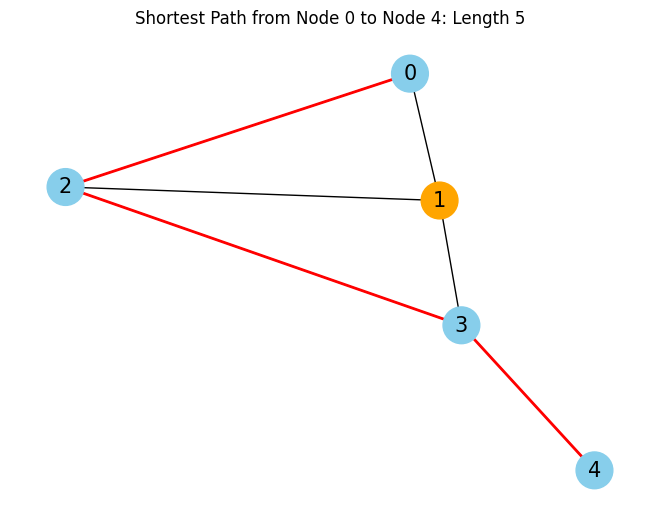

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define a function to create a graph
def create_graph():
    G = nx.Graph()
    G.add_edge(0, 1, weight=4)
    G.add_edge(0, 2, weight=1)
    G.add_edge(1, 2, weight=2)
    G.add_edge(1, 3, weight=5)
    G.add_edge(2, 3, weight=1)
    G.add_edge(3, 4, weight=3)
    return G

# Define a function to find the shortest path
def shortest_path(graph, source, target):
    path = nx.dijkstra_path(graph, source=source, target=target)
    length = nx.dijkstra_path_length(graph, source=source, target=target)
    return path, length

# Create a graph
G = create_graph()

# Find the shortest path from node 0 to node 4
source = 0
target = 4
shortest_path, length = shortest_path(G, source, target)

# Get all nodes except the source and target
other_nodes = set(G.nodes()) - set([source, target])

# Visualize the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Assign colors to nodes
node_colors = ['skyblue' if node in shortest_path else 'orange' for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, edge_color='k', linewidths=1, font_size=15)
# Highlight the shortest path
edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color='r')
plt.title("Shortest Path from Node {} to Node {}: Length {}".format(source, target, length))
plt.show()


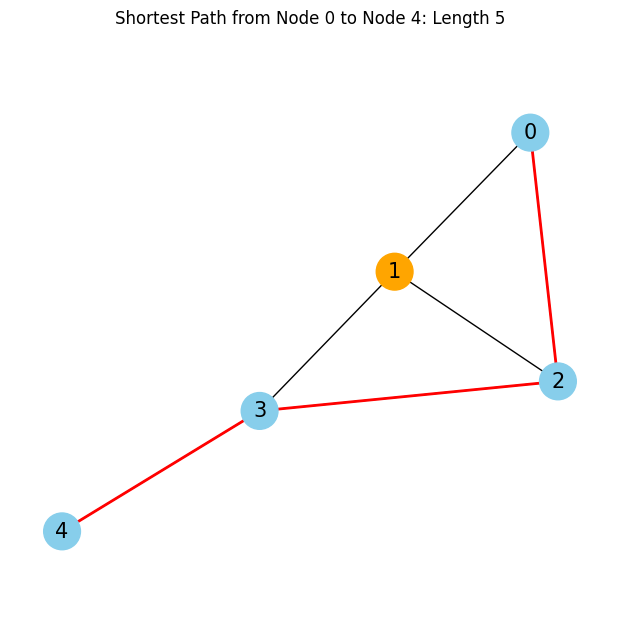

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define a function to create a graph
def create_graph():
    G = nx.Graph()
    G.add_edge(0, 1, weight=4)
    G.add_edge(0, 2, weight=1)
    G.add_edge(1, 2, weight=2)
    G.add_edge(1, 3, weight=5)
    G.add_edge(2, 3, weight=1)
    G.add_edge(3, 4, weight=3)
    return G

# Define a function to find the shortest path
def shortest_path(graph, source, target):
    path = nx.dijkstra_path(graph, source=source, target=target)
    length = nx.dijkstra_path_length(graph, source=source, target=target)
    return path, length

# Create a graph
G = create_graph()

# Find the shortest path from node 0 to node 4
source = 0
target = 4
shortest_path, length = shortest_path(G, source, target)

# Get all nodes except the source and target
other_nodes = set(G.nodes()) - set([source, target])

# Visualize the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Set figure size to make it square-shaped
plt.figure(figsize=(6, 6))

# Assign colors to nodes
node_colors = ['skyblue' if node in shortest_path else 'orange' for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, edge_color='k', linewidths=1, font_size=15)
# Highlight the shortest path
edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color='r')
plt.title("Shortest Path from Node {} to Node {}: Length {}".format(source, target, length))
plt.axis('equal')  # Make the axes of the plot equally scaled
plt.show()


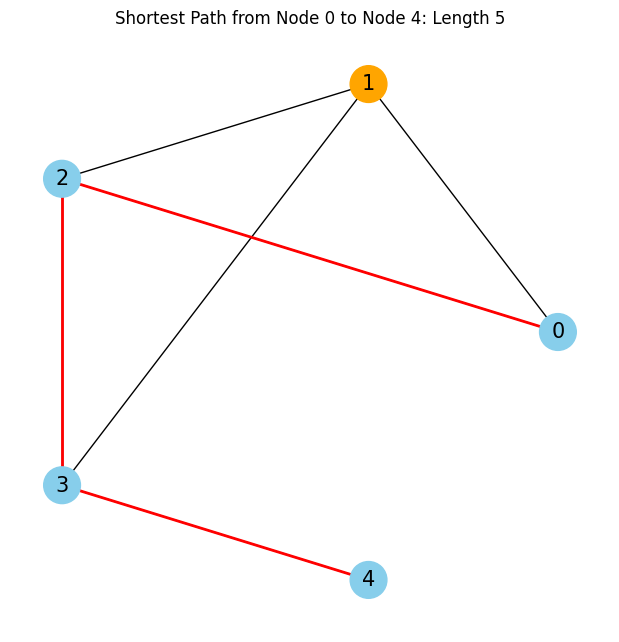

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define a function to create a graph
def create_graph():
    G = nx.Graph()
    G.add_edge(0, 1, weight=4)
    G.add_edge(0, 2, weight=1)
    G.add_edge(1, 2, weight=2)
    G.add_edge(1, 3, weight=5)
    G.add_edge(2, 3, weight=1)
    G.add_edge(3, 4, weight=3)
    return G

# Define a function to find the shortest path
def shortest_path(graph, source, target):
    path = nx.dijkstra_path(graph, source=source, target=target)
    length = nx.dijkstra_path_length(graph, source=source, target=target)
    return path, length

# Create a graph
G = create_graph()

# Find the shortest path from node 0 to node 4
source = 0
target = 4
shortest_path, length = shortest_path(G, source, target)

# Get all nodes except the source and target
other_nodes = set(G.nodes()) - set([source, target])

# Visualize the graph
pos = nx.circular_layout(G)  # positions for all nodes

# Set figure size to make it square-shaped
plt.figure(figsize=(6, 6))

# Assign colors to nodes
node_colors = ['skyblue' if node in shortest_path else 'orange' for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, edge_color='k', linewidths=1, font_size=15)
# Highlight the shortest path
edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color='r')
plt.title("Shortest Path from Node {} to Node {}: Length {}".format(source, target, length))
plt.show()


In [ ]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def bellman_ford(self, src):
        # Step 1: Initialize distances
        dist = [float("Inf")] * self.V
        dist[src] = 0

        # Step 2: Repeat relaxation for m+1 passes
        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w

        # Step 3: Check for negative-weight cycles
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                return

        # Step 4: Terminate
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains shortest path with more than m edges")
                return

        print("Shortest distances from source vertex:")
        for i in range(self.V):
            print(f"Vertex {i}: Distance = {dist[i]}")


# Example usage:
g = Graph(5)
g.add_edge(0, 1, 6)
g.add_edge(0, 2, 7)
g.add_edge(1, 2, 8)
g.add_edge(1, 3, 5)
g.add_edge(2, 3, -3)
g.add_edge(3, 4, 9)

source = 0
g.bellman_ford(source)


Shortest distances from source vertex:
Vertex 0: Distance = 0
Vertex 1: Distance = 6
Vertex 2: Distance = 7
Vertex 3: Distance = 4
Vertex 4: Distance = 13


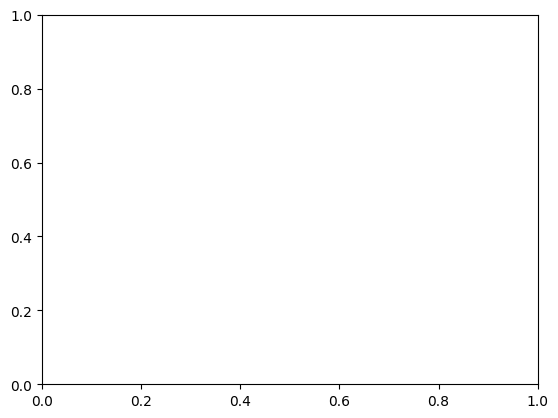

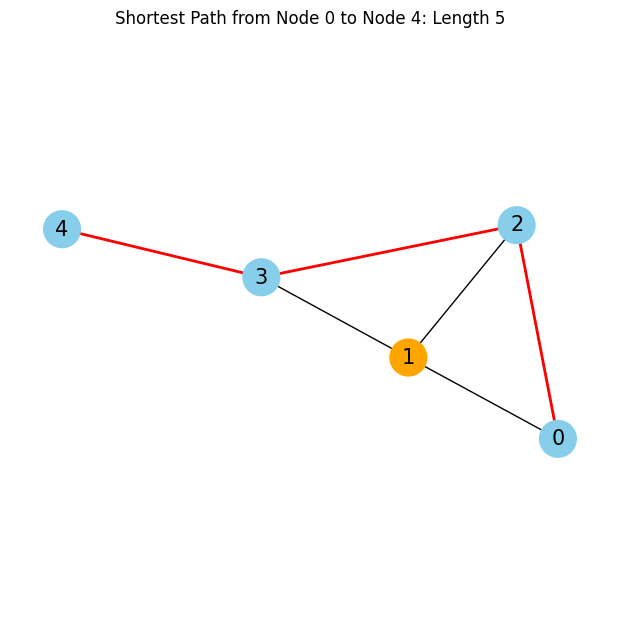

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define a function to create a graph
def create_graph():
    G = nx.Graph()
    G.add_edge(0, 1, weight=4)
    G.add_edge(0, 2, weight=1)
    G.add_edge(1, 2, weight=2)
    G.add_edge(1, 3, weight=5)
    G.add_edge(2, 3, weight=1)
    G.add_edge(3, 4, weight=3)
    return G

# Define a function to find the shortest path
def shortest_path(graph, source, target):
    path = nx.dijkstra_path(graph, source=source, target=target)
    length = nx.dijkstra_path_length(graph, source=source, target=target)
    return path, length

# Create a graph
G = create_graph()

# Find the shortest path from node 0 to node 4
source = 0
target = 4
shortest_path, length = shortest_path(G, source, target)

# Get all nodes except the source and target
other_nodes = set(G.nodes()) - set([source, target])

# Visualize the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Create a figure and axis
fig, ax = plt.subplots()

# Set figure size to make it square-shaped
plt.figure(figsize=(6, 6))

# Assign colors to nodes
node_colors = ['skyblue' if node in shortest_path else 'orange' for node in G.nodes()]

# Draw the graph with nodes colored
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, edge_color='k', linewidths=1, font_size=15)

# Highlight the shortest path
edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color='r')

# Function to update the animation
def update(frame):
    if frame < len(edges):
        # Highlight the current edge
        nx.draw_networkx_edges(G, pos, edgelist=[edges[frame]], width=4, edge_color='g')

# Create animation
ani = FuncAnimation(fig, update, frames=len(edges)+1, interval=1000)
plt.title("Shortest Path from Node {} to Node {}: Length {}".format(source, target, length))
plt.axis('equal')
plt.show()


In [ ]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def bellman_ford(self, src):
        # Step 1: Initialize distances
        dist = [float("Inf")] * self.V
        dist[src] = 0

        # Step 2: Repeat relaxation for m+1 passes
        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w

        # Step 3: Check for negative-weight cycles
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                return

        # Step 4: Terminate
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains shortest path with more than m edges")
                return

        print("Shortest distances from source vertex:")
        for i in range(self.V):
            print(f"Vertex {i}: Distance = {dist[i]}")


# Example usage:
g = Graph(5)
g.add_edge(0, 1, 6)
g.add_edge(0, 2, 7)
g.add_edge(1, 2, 8)
g.add_edge(1, 3, 5)
g.add_edge(2, 3, -3)
g.add_edge(3, 4, 9)

source = 0
g.bellman_ford(source)


Shortest distances from source vertex:
Vertex 0: Distance = 0
Vertex 1: Distance = 6
Vertex 2: Distance = 7
Vertex 3: Distance = 4
Vertex 4: Distance = 13


Shortest distances from source vertex:
Vertex 0: Distance = 0
Vertex 1: Distance = 6
Vertex 2: Distance = 7
Vertex 3: Distance = 4
Vertex 4: Distance = 13


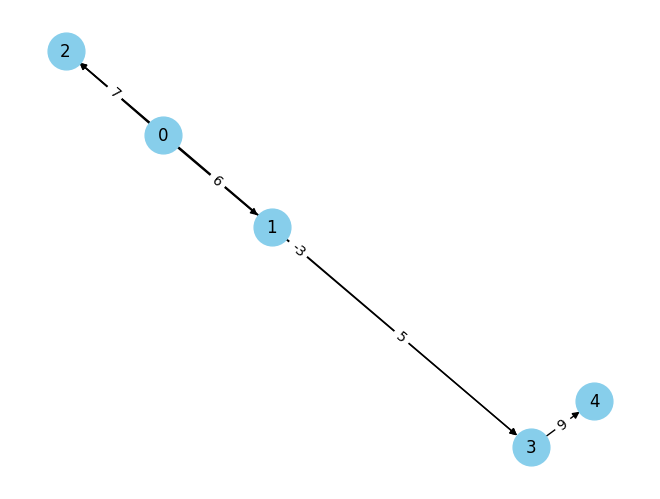

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def bellman_ford(self, src):
        # Step 1: Initialize distances
        dist = [float("Inf")] * self.V
        dist[src] = 0

        # Step 2: Repeat relaxation for m+1 passes
        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w

        # Step 3: Check for negative-weight cycles
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                return

        # Step 4: Terminate
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains shortest path with more than m edges")
                return

        print("Shortest distances from source vertex:")
        for i in range(self.V):
            print(f"Vertex {i}: Distance = {dist[i]}")

        # Visualization
        G = nx.DiGraph()
        G.add_weighted_edges_from([(u, v, w) for u, v, w in self.graph])
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue")
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        plt.show()


# Example usage:
g = Graph(5)
g.add_edge(0, 1, 6)
g.add_edge(0, 2, 7)
g.add_edge(1, 2, 8)
g.add_edge(1, 3, 5)
g.add_edge(2, 3, -3)
g.add_edge(3, 4, 9)

source = 0
g.bellman_ford(source)


Shortest distances from source vertex:
Vertex 0: Distance = 0
Vertex 1: Distance = 6
Vertex 2: Distance = 7
Vertex 3: Distance = 4
Vertex 4: Distance = 13


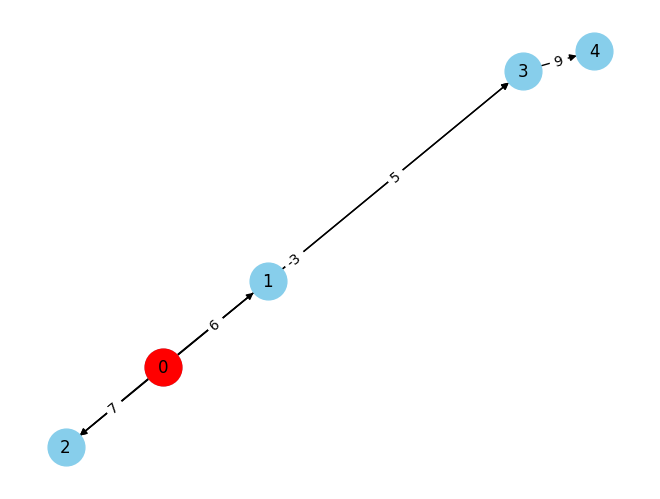

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def bellman_ford(self, src):
        # Step 1: Initialize distances
        dist = [float("Inf")] * self.V
        dist[src] = 0

        # Step 2: Repeat relaxation for m+1 passes
        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w

        # Step 3: Check for negative-weight cycles
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                return

        # Step 4: Terminate
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains shortest path with more than m edges")
                return

        print("Shortest distances from source vertex:")
        for i in range(self.V):
            print(f"Vertex {i}: Distance = {dist[i]}")

        # Visualization
        G = nx.DiGraph()
        G.add_weighted_edges_from([(u, v, w) for u, v, w in self.graph])
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue")
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        nx.draw_networkx_nodes(G, pos, nodelist=[src], node_color='red', node_size=700)
        plt.show()


# Example usage:
g = Graph(5)
g.add_edge(0, 1, 6)
g.add_edge(0, 2, 7)
g.add_edge(1, 2, 8)
g.add_edge(1, 3, 5)
g.add_edge(2, 3, -3)
g.add_edge(3, 4, 9)

source = 0
g.bellman_ford(source)


Shortest distances from source vertex:
Vertex 0: Distance = 0
Vertex 1: Distance = 6
Vertex 2: Distance = 7
Vertex 3: Distance = 4
Vertex 4: Distance = 13


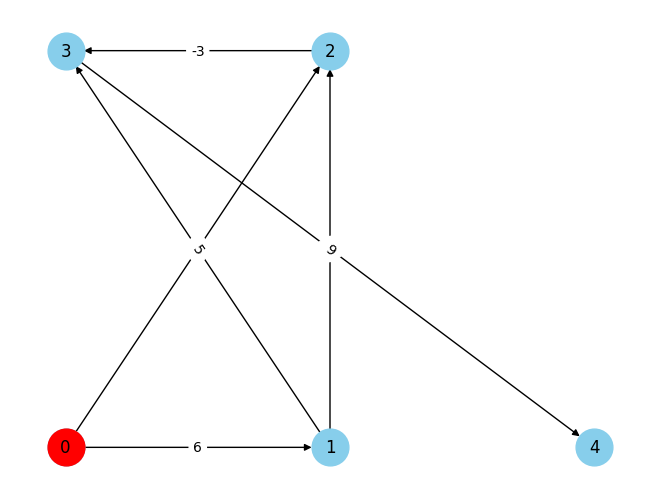

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def bellman_ford(self, src):
        # Step 1: Initialize distances
        dist = [float("Inf")] * self.V
        dist[src] = 0

        # Step 2: Repeat relaxation for m+1 passes
        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w

        # Step 3: Check for negative-weight cycles
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                return

        # Step 4: Terminate
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains shortest path with more than m edges")
                return

        print("Shortest distances from source vertex:")
        for i in range(self.V):
            print(f"Vertex {i}: Distance = {dist[i]}")

        # Visualization
        G = nx.DiGraph()
        G.add_weighted_edges_from([(u, v, w) for u, v, w in self.graph])
        pos = {0: (0, 0), 1: (1, 0), 2: (1, 1), 3: (0, 1), 4: (2, 0)}  # Manual positions for a square
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue")
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        nx.draw_networkx_nodes(G, pos, nodelist=[src], node_color='red', node_size=700)
        plt.show()


# Example usage:
g = Graph(5)
g.add_edge(0, 1, 6)
g.add_edge(0, 2, 7)
g.add_edge(1, 2, 8)
g.add_edge(1, 3, 5)
g.add_edge(2, 3, -3)
g.add_edge(3, 4, 9)

source = 0
g.bellman_ford(source)


Shortest distances from source vertex:
Vertex 0: Distance = 0
Vertex 1: Distance = 6
Vertex 2: Distance = 7
Vertex 3: Distance = 4
Vertex 4: Distance = 13


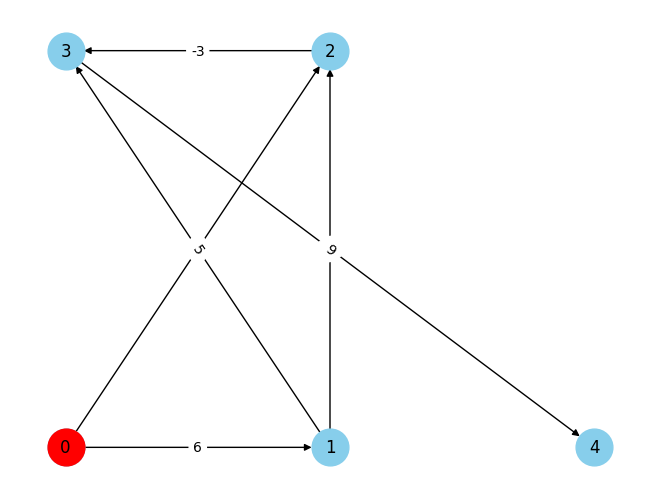

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def bellman_ford(self, src):
        # Step 1: Initialize distances
        dist = [float("Inf")] * self.V
        dist[src] = 0

        # Step 2: Repeat relaxation for m+1 passes
        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w

        # Step 3: Check for negative-weight cycles
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                return

        # Step 4: Terminate
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains shortest path with more than m edges")
                return

        print("Shortest distances from source vertex:")
        for i in range(self.V):
            print(f"Vertex {i}: Distance = {dist[i]}")

        # Visualization
        G = nx.DiGraph()
        G.add_weighted_edges_from([(u, v, w) for u, v, w in self.graph])
        pos = {0: (0, 0), 1: (1, 0), 2: (1, 1), 3: (0, 1), 4: (2, 0)}  # Manual positions for a square
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue")
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        nx.draw_networkx_nodes(G, pos, nodelist=[src], node_color='red', node_size=700)
        plt.show()


# Example usage:
g = Graph(5)
g.add_edge(0, 1, 6)
g.add_edge(0, 2, 7)
g.add_edge(1, 2, 8)
g.add_edge(1, 3, 5)
g.add_edge(2, 3, -3)
g.add_edge(3, 4, 9)

source = 0
g.bellman_ford(source)


Shortest distances from source vertex:
Vertex 0: Distance = 0
Vertex 1: Distance = 6
Vertex 2: Distance = 7
Vertex 3: Distance = 4
Vertex 4: Distance = 13


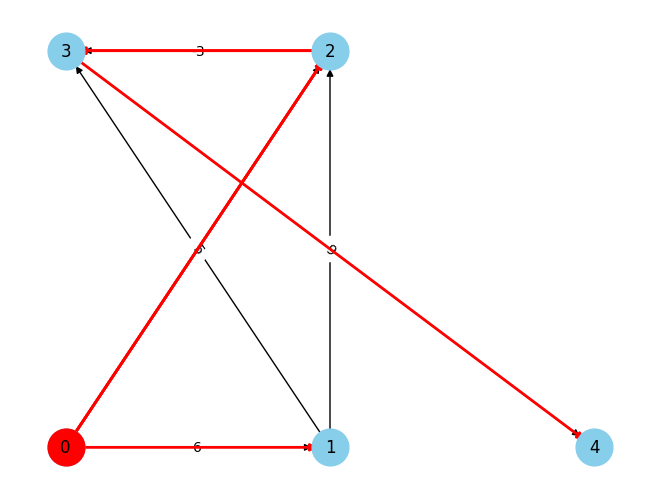

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def bellman_ford(self, src):
        # Step 1: Initialize distances and predecessor vertices
        dist = [float("Inf")] * self.V
        dist[src] = 0
        pred = [None] * self.V

        # Step 2: Repeat relaxation for m+1 passes
        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w
                    pred[v] = u

        # Step 3: Check for negative-weight cycles
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                return

        # Step 4: Terminate
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains shortest path with more than m edges")
                return

        print("Shortest distances from source vertex:")
        for i in range(self.V):
            print(f"Vertex {i}: Distance = {dist[i]}")

        # Visualization
        G = nx.DiGraph()
        G.add_weighted_edges_from([(u, v, w) for u, v, w in self.graph])
        pos = {0: (0, 0), 1: (1, 0), 2: (1, 1), 3: (0, 1), 4: (2, 0)}  # Manual positions for a square
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue")
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        nx.draw_networkx_nodes(G, pos, nodelist=[src], node_color='red', node_size=700)

        # Draw shortest paths
        for i in range(self.V):
            if i != src:
                path = [i]
                while pred[path[-1]] is not None:
                    path.append(pred[path[-1]])
                path.reverse()
                for j in range(len(path) - 1):
                    nx.draw_networkx_edges(G, pos, edgelist=[(path[j], path[j+1])], edge_color='red', width=2)

        plt.show()


# Example usage:
g = Graph(5)
g.add_edge(0, 1, 6)
g.add_edge(0, 2, 7)
g.add_edge(1, 2, 8)
g.add_edge(1, 3, 5)
g.add_edge(2, 3, -3)
g.add_edge(3, 4, 9)

source = 0
g.bellman_ford(source)


Shortest distances from source vertex:
Vertex 0: Distance = 0
Vertex 1: Distance = 6
Vertex 2: Distance = 7
Vertex 3: Distance = 4
Vertex 4: Distance = 13


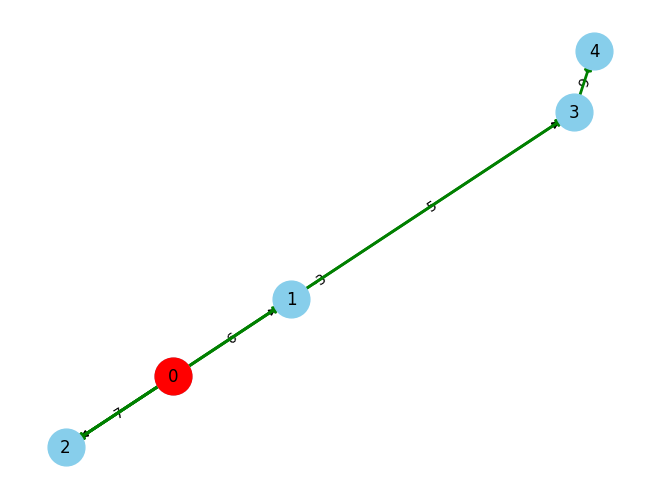

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def bellman_ford(self, src):
        # Step 1: Initialize distances
        dist = [float("Inf")] * self.V
        dist[src] = 0

        # Step 2: Repeat relaxation for m+1 passes
        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w

        # Step 3: Check for negative-weight cycles
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                return

        # Step 4: Terminate
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains shortest path with more than m edges")
                return

        print("Shortest distances from source vertex:")
        for i in range(self.V):
            print(f"Vertex {i}: Distance = {dist[i]}")

        # Visualization
        G = nx.DiGraph()
        G.add_weighted_edges_from([(u, v, w) for u, v, w in self.graph])
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue")
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        nx.draw_networkx_nodes(G, pos, nodelist=[src], node_color='red', node_size=700)

        # Highlight shortest paths
        for i in range(self.V):
            if i != src:
                path = nx.shortest_path(G, source=src, target=i, weight='weight')
                edges = [(path[j], path[j + 1]) for j in range(len(path) - 1)]
                nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='green', width=2)

        plt.show()


# Example usage:
g = Graph(5)
g.add_edge(0, 1, 6)
g.add_edge(0, 2, 7)
g.add_edge(1, 2, 8)
g.add_edge(1, 3, 5)
g.add_edge(2, 3, -3)
g.add_edge(3, 4, 9)

source = 0
g.bellman_ford(source)


Shortest distances from source vertex:
Vertex 0: Distance = 0
Vertex 1: Distance = 6
Vertex 2: Distance = 7
Vertex 3: Distance = 4
Vertex 4: Distance = 13


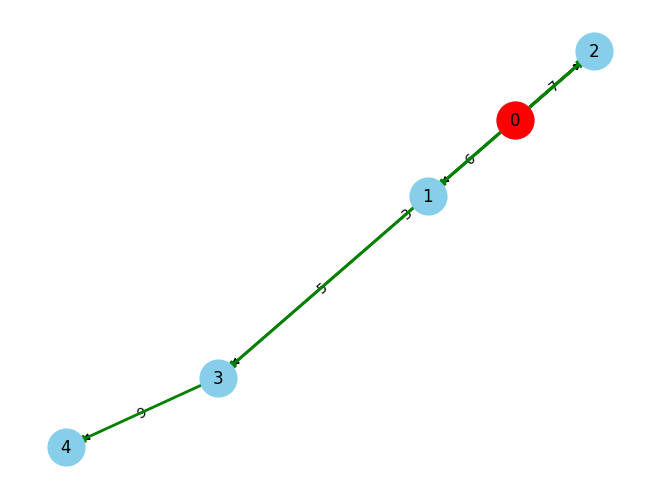

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def bellman_ford(self, src):
        # Step 1: Initialize distances
        dist = [float("Inf")] * self.V
        dist[src] = 0

        # Step 2: Repeat relaxation for m+1 passes
        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w

        # Step 3: Check for negative-weight cycles
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                return

        # Step 4: Terminate
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains shortest path with more than m edges")
                return

        print("Shortest distances from source vertex:")
        for i in range(self.V):
            print(f"Vertex {i}: Distance = {dist[i]}")

        # Visualization
        G = nx.DiGraph()
        G.add_weighted_edges_from([(u, v, w) for u, v, w in self.graph])
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue")
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        nx.draw_networkx_nodes(G, pos, nodelist=[src], node_color='red', node_shape='o', node_size=700)

        # Highlight shortest paths
        for i in range(self.V):
            if i != src:
                path = nx.shortest_path(G, source=src, target=i, weight='weight')
                edges = [(path[j], path[j + 1]) for j in range(len(path) - 1)]
                nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='green', width=2)

        plt.show()


# Example usage:
g = Graph(5)
g.add_edge(0, 1, 6)
g.add_edge(0, 2, 7)
g.add_edge(1, 2, 8)
g.add_edge(1, 3, 5)
g.add_edge(2, 3, -3)
g.add_edge(3, 4, 9)

source = 0
g.bellman_ford(source)


Shortest distances from source vertex:
Vertex 0: Distance = 0
Vertex 1: Distance = 6
Vertex 2: Distance = 7
Vertex 3: Distance = 4
Vertex 4: Distance = 13


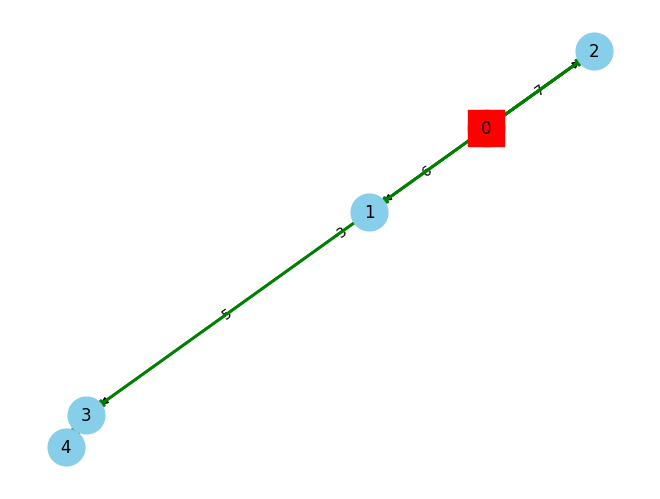

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def bellman_ford(self, src):
        # Step 1: Initialize distances
        dist = [float("Inf")] * self.V
        dist[src] = 0

        # Step 2: Repeat relaxation for m+1 passes
        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w

        # Step 3: Check for negative-weight cycles
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                return

        # Step 4: Terminate
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains shortest path with more than m edges")
                return

        print("Shortest distances from source vertex:")
        for i in range(self.V):
            print(f"Vertex {i}: Distance = {dist[i]}")

        # Visualization
        G = nx.DiGraph()
        G.add_weighted_edges_from([(u, v, w) for u, v, w in self.graph])
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue")
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        nx.draw_networkx_nodes(G, pos, nodelist=[src], node_color='red', node_shape='s', node_size=700)

        # Highlight shortest paths
        for i in range(self.V):
            if i != src:
                path = nx.shortest_path(G, source=src, target=i, weight='weight')
                edges = [(path[j], path[j + 1]) for j in range(len(path) - 1)]
                nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='green', width=2)

        plt.show()


# Example usage:
g = Graph(5)
g.add_edge(0, 1, 6)
g.add_edge(0, 2, 7)
g.add_edge(1, 2, 8)
g.add_edge(1, 3, 5)
g.add_edge(2, 3, -3)
g.add_edge(3, 4, 9)

source = 0
g.bellman_ford(source)


In [ ]:
import numpy as np

def bellman_ford_like(G, s):
    n = len(G)
    # Initialize distance vector
    d = np.full(n, np.inf)
    d[s] = 0

    # Convert the adjacency list representation to adjacency matrix
    A = np.zeros((n, n))
    for u in range(n):
        for v, w in G[u]:
            A[u][v] = w

    # Perform Bellman-Ford-like iterations
    for _ in range(n - 1):
        d_new = np.minimum(d, np.min(A + d, axis=0))
        if np.array_equal(d, d_new):
            break
        d = d_new

    return d

# Example graph represented as adjacency list
# Format: (vertex, weight)
# Example graph:
#   0 --(1)--> 1 --(1)--> 2
#    \        / \        /
#   (3)    (1)   (3)  (1)
#     \   /       \   /
#      3 --(2)--> 4
G = [
    [(1, 1), (3, 3)],
    [(2, 1), (4, 1)],
    [(0, 1), (4, 3)],
    [(1, 3), (4, 2)],
    [(2, 3), (3, 2)]
]

# Source vertex
source = 0

# Calculate shortest paths
shortest_paths = bellman_ford_like(G, source)
print("Shortest paths from source vertex", source, ":", shortest_paths)


Shortest paths from source vertex 0 : [ 0. inf inf inf inf]


In [ ]:
import numpy as np

def bellman_ford(adj_matrix, source):
    # Number of vertices
    num_vertices = len(adj_matrix)

    # Initialize distance vector
    distance = np.full(num_vertices, np.inf)
    distance[source] = 0

    # Perform Bellman-Ford iterations
    for _ in range(num_vertices - 1):
        # Update distance vector using matrix-vector multiplication
        distance = np.minimum(distance, np.min(adj_matrix + np.expand_dims(distance, axis=1), axis=0))

    # Check for negative-weight cycles
    for u in range(num_vertices):
        for v in range(num_vertices):
            if distance[u] + adj_matrix[u][v] < distance[v]:
                return False, None

    return True, distance

# Example usage
adj_matrix = np.array([[0, 4, np.inf, np.inf, np.inf],
                       [np.inf, 0, -1, np.inf, np.inf],
                       [np.inf, np.inf, 0, 2, np.inf],
                       [np.inf, np.inf, np.inf, 0, -3],
                       [5, np.inf, np.inf, np.inf, 0]])

source_vertex = 0
has_negative_cycle, shortest_distances = bellman_ford(adj_matrix, source_vertex)

if has_negative_cycle:
    print("Graph contains negative-weight cycle.")
else:
    print("Shortest distances from source vertex:")
    print(shortest_distances)


Graph contains negative-weight cycle.


In [ ]:
import numpy as np

def bellman_ford(adj_matrix, source):
    num_vertices = len(adj_matrix)
    distance = np.full(num_vertices, np.inf)
    distance[source] = 0

    # Perform |V| - 1 iterations
    for _ in range(num_vertices - 1):
        # Update distance vector using matrix-vector multiplication
        distance = np.minimum(distance, np.min(adj_matrix + distance, axis=1))

    # Check for negative cycles
    for i in range(num_vertices):
        for j in range(num_vertices):
            if distance[j] > distance[i] + adj_matrix[i][j]:
                print("Graph contains negative cycle")
                return None

    return distance

# Example usage
adj_matrix = np.array([[0, 5, np.inf, 8, 9],
                       [np.inf, 0, 3, np.inf, 7],
                       [np.inf, np.inf, 0, 4, np.inf],
                       [np.inf, np.inf, np.inf, 0, 2],
                       [np.inf, np.inf, np.inf, np.inf, 0]])

source_vertex = 0
shortest_distances = bellman_ford(adj_matrix, source_vertex)
if shortest_distances is not None:
    print("Shortest distances from source vertex {}: {}".format(source_vertex, shortest_distances))


Graph contains negative cycle


In [ ]:
import numpy as np

class Graph:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adj_matrix = np.zeros((num_vertices, num_vertices))
        self.inf = float('inf')

    def add_edge(self, source, destination, weight):
        self.adj_matrix[source][destination] = weight

    def display(self):
        print("Adjacency Matrix:")
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if self.adj_matrix[i][j] == 0:
                    print("{:4s}".format("inf"), end=" ")
                else:
                    print("{:4d}".format(int(self.adj_matrix[i][j])), end=" ")
            print()

# Example usage:
g = Graph(4)
g.add_edge(0, 1, 5)
g.add_edge(0, 3, 3)
g.add_edge(1, 2, 7)
g.add_edge(2, 3, 4)

g.display()


Adjacency Matrix:
inf     5 inf     3 
inf  inf     7 inf  
inf  inf  inf     4 
inf  inf  inf  inf  


Adjacency Matrix:
inf     5 inf     3 
inf  inf     7 inf  
inf  inf  inf     4 
inf  inf  inf  inf  


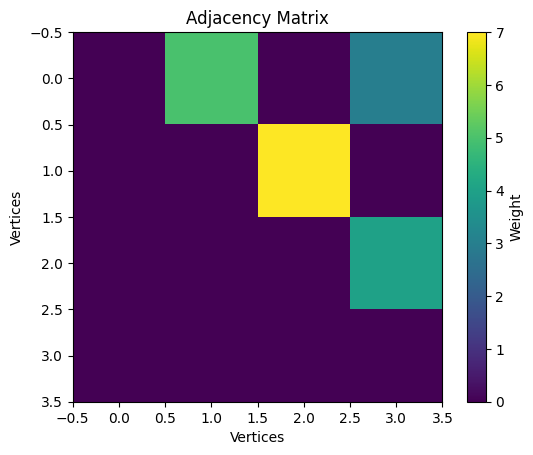

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adj_matrix = np.zeros((num_vertices, num_vertices))
        self.inf = float('inf')

    def add_edge(self, source, destination, weight):
        self.adj_matrix[source][destination] = weight

    def display(self):
        print("Adjacency Matrix:")
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if self.adj_matrix[i][j] == 0:
                    print("{:4s}".format("inf"), end=" ")
                else:
                    print("{:4d}".format(int(self.adj_matrix[i][j])), end=" ")
            print()

    def visualize(self):
        plt.imshow(self.adj_matrix, cmap='viridis', interpolation='nearest')
        plt.colorbar(label="Weight")
        plt.title("Adjacency Matrix")
        plt.xlabel("Vertices")
        plt.ylabel("Vertices")
        plt.show()

# Example usage:
g = Graph(4)
g.add_edge(0, 1, 5)
g.add_edge(0, 3, 3)
g.add_edge(1, 2, 7)
g.add_edge(2, 3, 4)

g.display()
g.visualize()


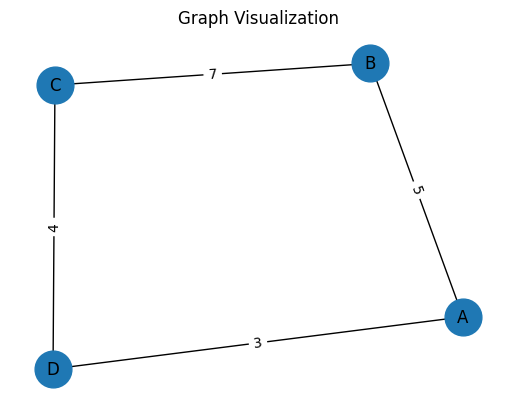

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self):
        self.graph = nx.Graph()

    def add_edge(self, source, destination, weight):
        self.graph.add_edge(source, destination, weight=weight)

    def visualize(self):
        pos = nx.spring_layout(self.graph)  # Positions for all nodes

        # Draw nodes
        nx.draw_networkx_nodes(self.graph, pos, node_size=700)

        # Draw edges
        nx.draw_networkx_edges(self.graph, pos)

        # Draw edge labels
        edge_labels = nx.get_edge_attributes(self.graph, 'weight')
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)

        # Draw node labels
        nx.draw_networkx_labels(self.graph, pos)

        plt.title("Graph Visualization")
        plt.axis('off')  # Turn off axis
        plt.show()

# Example usage:
g = Graph()
g.add_edge('A', 'B', 5)
g.add_edge('A', 'D', 3)
g.add_edge('B', 'C', 7)
g.add_edge('C', 'D', 4)

g.visualize()


In [ ]:
import numpy as np

def bellman_ford(adj_matrix, source):
    num_vertices = len(adj_matrix)
    distances = np.full(num_vertices, np.inf)  # Initialize distances to infinity
    distances[source] = 0  # Set distance to source vertex to 0

    # Repeat |V| - 1 times
    for _ in range(num_vertices - 1):
        # Perform matrix-vector multiplication: distances = adj_matrix * distances
        distances = np.minimum(distances, np.dot(adj_matrix, distances))

    # Check for negative cycles
    for u in range(num_vertices):
        for v in range(num_vertices):
            if adj_matrix[u][v] != np.inf and distances[v] > distances[u] + adj_matrix[u][v]:
                # Negative cycle detected
                print("Graph contains negative cycle")
                return None

    return distances

# Example adjacency matrix representing the graph
adj_matrix = [
    [0, 5, np.inf, np.inf],
    [np.inf, 0, 7, np.inf],
    [3, np.inf, 0, 4],
    [np.inf, np.inf, np.inf, 0]
]

# Source vertex
source_vertex = 0

# Compute shortest paths using Bellman-Ford algorithm
shortest_paths = bellman_ford(adj_matrix, source_vertex)
if shortest_paths is not None:
    print("Shortest paths from source vertex:")
    print(shortest_paths)


Shortest paths from source vertex:
[nan nan nan nan]


In [ ]:
pip install networkx


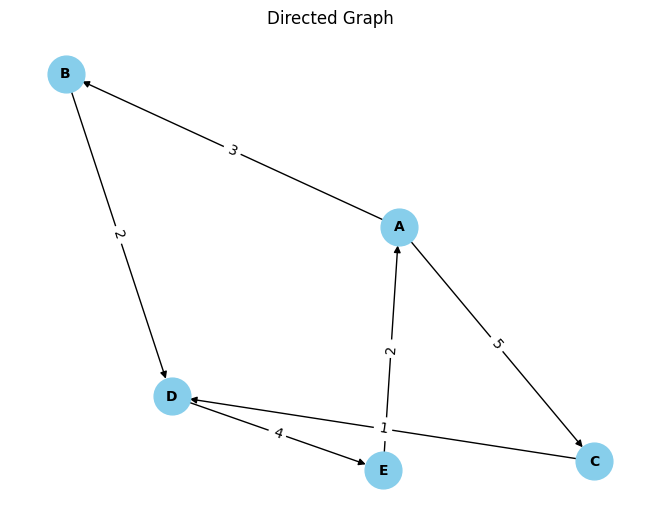

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'])

# Add edges with weights
edges = [('A', 'B', {'weight': 3}), ('A', 'C', {'weight': 5}),
         ('B', 'D', {'weight': 2}), ('C', 'D', {'weight': 1}),
         ('D', 'E', {'weight': 4}), ('E', 'A', {'weight': 2})]
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.title('Directed Graph')
plt.axis('off')
plt.show()


In [ ]:
import numpy as np

def bellman_ford_like(adj_matrix, source):
    num_vertices = len(adj_matrix)

    # Initialize the shortest path estimates vector
    shortest_paths = np.full(num_vertices, np.inf)
    shortest_paths[source] = 0

    # Perform relaxation iteratively
    for _ in range(num_vertices - 1):
        shortest_paths = np.minimum(shortest_paths, np.dot(adj_matrix, shortest_paths))

    # Check for negative-weight cycles
    for u in range(num_vertices):
        for v in range(num_vertices):
            if shortest_paths[v] > shortest_paths[u] + adj_matrix[u][v]:
                return "Graph contains a negative-weight cycle"

    return shortest_paths

# Example graph represented as an adjacency matrix
# Change the values as needed to represent your graph
graph = [
    [0, 4, 0, 0, 0],
    [0, 0, -1, 0, 0],
    [0, 0, 0, 2, 0],
    [0, 0, 0, 0, -3],
    [0, 0, 0, 0, 0]
]

source_vertex = 0  # Source vertex for the shortest paths

# Call the Bellman-Ford-like algorithm function
result = bellman_ford_like(graph, source_vertex)
print("Shortest paths from source vertex:", result)


Shortest paths from source vertex: [nan nan nan nan nan]


In [ ]:
import numpy as np

def generate_random_graph(num_vertices, density=0.3, weight_range=(-10, 10)):
    # Generate a random adjacency matrix for a directed graph
    # density is the probability of having an edge between any two vertices
    # weight_range is the range of possible weights for the edges
    adjacency_matrix = np.zeros((num_vertices, num_vertices), dtype=int)
    for i in range(num_vertices):
        for j in range(num_vertices):
            if i != j and np.random.random() < density:
                adjacency_matrix[i][j] = np.random.randint(weight_range[0], weight_range[1] + 1)
    return adjacency_matrix

def bellman_ford_like(adj_matrix, source):
    num_vertices = len(adj_matrix)

    # Initialize the shortest path estimates vector
    shortest_paths = np.full(num_vertices, np.inf)
    shortest_paths[source] = 0

    # Perform relaxation iteratively
    for _ in range(num_vertices - 1):
        shortest_paths = np.minimum(shortest_paths, np.dot(adj_matrix, shortest_paths))

    # Check for negative-weight cycles
    for u in range(num_vertices):
        for v in range(num_vertices):
            if shortest_paths[v] > shortest_paths[u] + adj_matrix[u][v]:
                return "Graph contains a negative-weight cycle"

    return shortest_paths

# Generate a random directed graph
num_vertices = 5
adjacency_matrix = generate_random_graph(num_vertices)

# Choose a random source vertex
source_vertex = np.random.randint(num_vertices)

# Print the generated graph and the source vertex
print("Generated adjacency matrix:")
print(adjacency_matrix)
print("Source vertex:", source_vertex)

# Call the Bellman-Ford-like algorithm function
result = bellman_ford_like(adjacency_matrix, source_vertex)
print("Shortest paths from source vertex:", result)


Generated adjacency matrix:
[[ 0  0  0  0  0]
 [ 0  0  0  0  4]
 [ 0 10  0  0  0]
 [ 0  0  0  0  1]
 [ 5  0  0  0  0]]
Source vertex: 2
Shortest paths from source vertex: [nan nan nan nan nan]


In [ ]:
import numpy as np
import sys

def generate_random_graph(num_vertices, density=0.3, weight_range=(-10, 10)):
    # Generate a random adjacency matrix for a directed graph
    # density is the probability of having an edge between any two vertices
    # weight_range is the range of possible weights for the edges
    adjacency_matrix = np.zeros((num_vertices, num_vertices), dtype=int)
    for i in range(num_vertices):
        for j in range(num_vertices):
            if i != j and np.random.random() < density:
                adjacency_matrix[i][j] = np.random.randint(weight_range[0], weight_range[1] + 1)
    return adjacency_matrix

def bellman_ford(graph, source):
    num_vertices = len(graph)
    distance = [sys.maxsize] * num_vertices
    distance[source] = 0

    for _ in range(num_vertices - 1):
        for u in range(num_vertices):
            for v in range(num_vertices):
                if graph[u][v] != 0 and distance[u] != sys.maxsize and distance[u] + graph[u][v] < distance[v]:
                    distance[v] = distance[u] + graph[u][v]

    # Check for negative cycles
    for u in range(num_vertices):
        for v in range(num_vertices):
            if graph[u][v] != 0 and distance[u] != sys.maxsize and distance[u] + graph[u][v] < distance[v]:
                print("Graph contains a negative cycle")
                return

    return distance

# Generate a random directed graph
num_vertices = 5
adjacency_matrix = generate_random_graph(num_vertices)

# Choose a random source vertex
source_vertex = np.random.randint(num_vertices)

# Print the generated graph and the source vertex
print("Generated adjacency matrix:")
print(adjacency_matrix)
print("Source vertex:", source_vertex)

# Call the Bellman-Ford algorithm function
shortest_paths = bellman_ford(adjacency_matrix, source_vertex)
print("Shortest paths from source vertex:", shortest_paths)


Generated adjacency matrix:
[[ 0  0  0  0  0]
 [ 0  0 -6  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0 -3  0]]
Source vertex: 2
Shortest paths from source vertex: [9223372036854775807, 9223372036854775807, 0, 9223372036854775807, 9223372036854775807]


In [ ]:
import numpy as np

# Function to generate random directed graph data
def generate_random_graph(num_vertices):
    # Initialize adjacency matrix with zeros
    adjacency_matrix = np.zeros((num_vertices, num_vertices))

    # Populate adjacency matrix with random edge weights
    for i in range(num_vertices):
        for j in range(num_vertices):
            # Assign random weight to edges with 20% probability
            if np.random.rand() < 0.2:
                # Random weight between -10 and 10
                adjacency_matrix[i][j] = np.random.randint(-10, 11)

    return adjacency_matrix

# Bellman-Ford-like algorithm function
def bellman_ford_like(adj_matrix, source):
    num_vertices = len(adj_matrix)

    # Initialize the shortest path estimates vector
    shortest_paths = np.full(num_vertices, np.inf)
    shortest_paths[source] = 0

    # Perform relaxation iteratively
    for _ in range(num_vertices - 1):
        shortest_paths = np.minimum(shortest_paths, np.dot(adj_matrix, shortest_paths))

    # Check for negative-weight cycles
    for u in range(num_vertices):
        for v in range(num_vertices):
            if shortest_paths[v] > shortest_paths[u] + adj_matrix[u][v]:
                return "Graph contains a negative-weight cycle"

    return shortest_paths

# Generate random graph data
num_vertices = 5
source_vertex = 0
random_adj_matrix = generate_random_graph(num_vertices)
print("Randomly generated adjacency matrix:")
print(random_adj_matrix)

# Call the Bellman-Ford-like algorithm function
result = bellman_ford_like(random_adj_matrix, source_vertex)
print("\nShortest paths from source vertex:", result)


Randomly generated adjacency matrix:
[[ 0.  0. -4.  0.  0.]
 [ 0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]

Shortest paths from source vertex: [nan nan nan nan nan]


In [ ]:
import numpy as np

# Define the adjacency matrix representing the graph
# Rows and columns represent vertices, and values represent edge weights
adjacency_matrix = np.array([
    [0, 6, 0, 0, 0],
    [0, 0, 3, 5, 0],
    [0, -2, 0, 0, 0],
    [0, 0, -2, 0, -1],
    [0, 0, 0, 1, 0]
])

# Define the source vertex
source_vertex = 0

# Bellman-Ford-like algorithm function
def bellman_ford_like(adj_matrix, source):
    num_vertices = len(adj_matrix)

    # Initialize the shortest path estimates vector
    shortest_paths = np.full(num_vertices, np.inf)
    shortest_paths[source] = 0

    # Perform relaxation iteratively
    for _ in range(num_vertices - 1):
        shortest_paths = np.minimum(shortest_paths, np.dot(adj_matrix, shortest_paths))

    # Check for negative-weight cycles
    for u in range(num_vertices):
        for v in range(num_vertices):
            if shortest_paths[v] > shortest_paths[u] + adj_matrix[u][v]:
                return "Graph contains a negative-weight cycle"

    return shortest_paths

# Call the Bellman-Ford-like algorithm function
result = bellman_ford_like(adjacency_matrix, source_vertex)
print("Shortest paths from source vertex:", result)


Shortest paths from source vertex: [nan nan nan nan nan]


In [ ]:
import numpy as np

# Function to perform relaxation
def relax(u, v, w, d):
    if d[v] > d[u] + w[u][v]:
        d[v] = d[u] + w[u][v]

# Function to perform matrix-vector multiplication and relaxation
def bellman_ford_like(W, s):
    num_vertices = len(W)

    # Initialize shortest path estimates
    d = [float('inf')] * num_vertices
    d[s] = 0

    # Perform relaxation |V| - 1 times
    for _ in range(num_vertices - 1):
        for u in range(num_vertices):
            for v in range(num_vertices):
                if W[u][v] != float('inf'):
                    relax(u, v, W, d)

    # Check for negative-weight cycles
    for u in range(num_vertices):
        for v in range(num_vertices):
            if d[v] > d[u] + W[u][v]:
                return "Graph contains a negative-weight cycle"

    return d

# Example adjacency matrix representing the graph
W = [
    [0, 6, float('inf'), 7],
    [float('inf'), 0, 5, 8],
    [float('inf'), -4, 0, float('inf')],
    [float('inf'), float('inf'), -2, 0]
]

# Source vertex
source_vertex = 0

# Perform Bellman-Ford-like algorithm
shortest_paths = bellman_ford_like(W, source_vertex)
print("Shortest paths from source vertex:", shortest_paths)


Shortest paths from source vertex: [0, 1, 5, 7]


In [ ]:
from collections import deque

def is_possible_designation(n, rivalries):
    G = [[] for _ in range(n)]  # Create an adjacency list to represent the graph
    for wrestler1, wrestler2 in rivalries:
        G[wrestler1].append(wrestler2)
        G[wrestler2].append(wrestler1)

    colors = [-1] * n  # Initialize colors for all wrestlers (-1 for unassigned)

    def bfs(start):
        colors[start] = 0  # Assign color 0 to the starting wrestler
        queue = deque([start])
        while queue:
            current = queue.popleft()
            for neighbor in G[current]:
                if colors[neighbor] == -1:
                    colors[neighbor] = 1 - colors[current]  # Alternate between colors
                    queue.append(neighbor)
                elif colors[neighbor] == colors[current]:
                    return False  # Conflict found
        return True  # No conflict

    for i in range(n):
        if colors[i] == -1:  # Unassigned wrestler
            if not bfs(i):
                return False, None  # Conflict found, not possible
    return True, colors  # No conflict, return assignment

# Example usage:
n = 5
rivalries = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)]
possible, assignment = is_possible_designation(n, rivalries)
if possible:
    print("Possible designation:", assignment)
else:
    print("It is not possible to designate wrestlers as faces and heels.")


It is not possible to designate wrestlers as faces and heels.


In [ ]:
from collections import defaultdict

class Solution:
    def possibleDesignation(self, wrestlers, rivalries):
        graph = defaultdict(list)
        colors = {}

        # Construct the graph
        for w1, w2 in rivalries:
            graph[w1].append(w2)
            graph[w2].append(w1)

        def dfs(wrestler, color):
            colors[wrestler] = color
            next_color = "heel" if color == "face" else "face"

            for rival in graph[wrestler]:
                if rival not in colors:
                    if not dfs(rival, next_color):
                        return False
                elif colors[rival] == color:
                    return False

            return True

        # Color the wrestlers
        for wrestler in wrestlers:
            if wrestler not in colors:
                if not dfs(wrestler, "face"):
                    return "Impossible"

        # Output the designated colors
        return {wrestler: colors[wrestler] for wrestler in wrestlers}

# Example usage
wrestlers = ["John", "Mike", "Bob", "Tom"]
rivalries = [("John", "Mike"), ("Mike", "Bob"), ("Bob", "Tom")]

solution = Solution()
print(solution.possibleDesignation(wrestlers, rivalries))


{'John': 'face', 'Mike': 'heel', 'Bob': 'face', 'Tom': 'heel'}


In [ ]:
#BFS
from collections import defaultdict, deque

def assign_colors(wrestlers, rivalries):
    colors = {}
    graph = defaultdict(list)

    # Construct the graph
    for w1, w2 in rivalries:
        graph[w1].append(w2)
        graph[w2].append(w1)

    # Perform BFS traversal
    for wrestler in wrestlers:
        if wrestler not in colors:
            queue = deque([(wrestler, "face")])  # Start BFS from wrestler with "face" color
            colors[wrestler] = "face"

            while queue:
                current_wrestler, color = queue.popleft()

                for neighbor in graph[current_wrestler]:
                    if neighbor not in colors:
                        colors[neighbor] = "heel" if color == "face" else "face"
                        queue.append((neighbor, colors[neighbor]))
                    elif colors[neighbor] == color:
                        return "Impossible"  # Conflict found, impossible to assign colors

    return colors

# Example usage:
wrestlers = ["John", "Mike", "Alex", "Chris"]
rivalries = [("John", "Mike"), ("Alex", "Chris")]

color_assignment = assign_colors(wrestlers, rivalries)
if color_assignment != "Impossible":
    print("Color assignment:", color_assignment)
else:
    print("Impossible to assign colors without conflicts.")


Color assignment: {'John': 'face', 'Mike': 'heel', 'Alex': 'face', 'Chris': 'heel'}


Color assignment: {'John': 'face', 'Mike': 'heel', 'Alex': 'face', 'Chris': 'heel'}


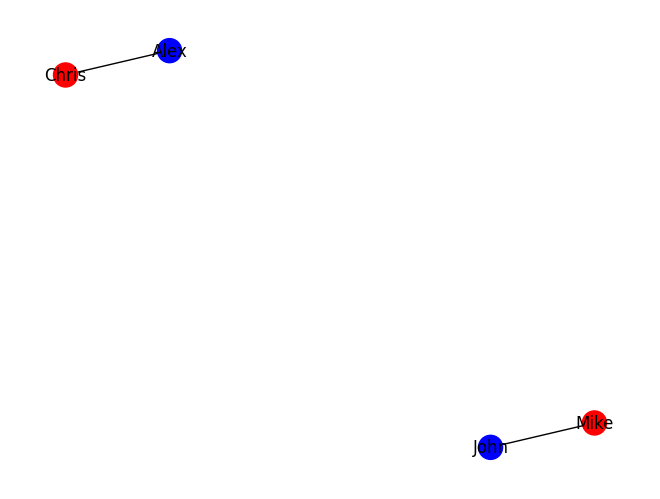

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict, deque

def assign_colors(wrestlers, rivalries):
    colors = {}
    graph = defaultdict(list)

    # Construct the graph
    for w1, w2 in rivalries:
        graph[w1].append(w2)
        graph[w2].append(w1)

    # Perform BFS traversal
    for wrestler in wrestlers:
        if wrestler not in colors:
            queue = deque([(wrestler, "face")])  # Start BFS from wrestler with "face" color
            colors[wrestler] = "face"

            while queue:
                current_wrestler, color = queue.popleft()

                for neighbor in graph[current_wrestler]:
                    if neighbor not in colors:
                        colors[neighbor] = "heel" if color == "face" else "face"
                        queue.append((neighbor, colors[neighbor]))
                    elif colors[neighbor] == color:
                        return "Impossible"  # Conflict found, impossible to assign colors

    return colors

# Example usage:
wrestlers = ["John", "Mike", "Alex", "Chris"]
rivalries = [("John", "Mike"), ("Alex", "Chris")]

color_assignment = assign_colors(wrestlers, rivalries)
if color_assignment != "Impossible":
    print("Color assignment:", color_assignment)
   # Visualization
G = nx.Graph()
G.add_nodes_from(wrestlers)
G.add_edges_from(rivalries)
pos = nx.spring_layout(G)  # Positions for all nodes

# Map assigned colors to RGB values
color_map = {'face': 'blue', 'heel': 'red'}
node_colors = [color_map[color_assignment[node]] for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=node_colors)
plt.show()



In [ ]:
from collections import defaultdict

def is_possible_designation(wrestlers, rivalries):
    graph = defaultdict(list)
    n = len(wrestlers)

    # Create graph
    for u, v in rivalries:
        graph[u].append(v)

    for wrestler in wrestlers:
        for other_wrestler in wrestlers:
            if other_wrestler != wrestler and other_wrestler not in graph[wrestler]:
                graph[wrestler].append(other_wrestler)

    # Bellman-Ford Algorithm
    distances = {wrestler: float('inf') for wrestler in wrestlers}
    distances[wrestlers[0]] = 0

    for _ in range(n - 1):
        for u in wrestlers:
            for v in graph[u]:
                if distances[u] + 1 < distances[v]:
                    distances[v] = distances[u] + 1

    # Check for negative cycle
    for u in wrestlers:
        for v in graph[u]:
            if distances[u] + 1 < distances[v]:
                return "Impossible"

    # Assign faces and heels
    designation = {}
    for wrestler in wrestlers:
        designation[wrestler] = "face" if distances[wrestler] % 2 == 0 else "heel"

    return designation

# Example usage:
wrestlers = ["John", "Mike", "Alex", "Chris"]
rivalries = [("John", "Mike"), ("Alex", "Chris")]

designation = is_possible_designation(wrestlers, rivalries)
if designation == "Impossible":
    print("It is impossible to assign faces and heels without conflicts.")
else:
    print("Designation:", designation)


Designation: {'John': 'face', 'Mike': 'heel', 'Alex': 'heel', 'Chris': 'heel'}


In [ ]:
from collections import defaultdict, deque

def assign_colors(wrestlers, rivalries):
    colors = {}
    graph = defaultdict(list)

    # Construct the graph
    for w1, w2 in rivalries:
        graph[w1].append(w2)
        graph[w2].append(w1)

    # Perform BFS traversal
    for wrestler in wrestlers:
        if wrestler not in colors:
            queue = deque([(wrestler, "face")])  # Start BFS from wrestler with "face" color
            colors[wrestler] = "face"

            while queue:
                current_wrestler, color = queue.popleft()

                for neighbor in graph[current_wrestler]:
                    if neighbor not in colors:
                        colors[neighbor] = "heel" if color == "face" else "face"
                        queue.append((neighbor, colors[neighbor]))
                    elif colors[neighbor] == color:
                        return "Impossible"  # Conflict found, impossible to assign colors

    return colors

# Example usage:
wrestlers = ["John", "Mike", "Alex", "Chris"]
rivalries = [("John", "Mike"), ("Alex", "Chris")]

color_assignment = assign_colors(wrestlers, rivalries)
if color_assignment != "Impossible":
    print("Color assignment:", color_assignment)
else:
    print("Impossible to assign colors without conflicts.")


Color assignment: {'John': 'face', 'Mike': 'heel', 'Alex': 'face', 'Chris': 'heel'}


In [ ]:
from collections import defaultdict, deque

def assign_colors(wrestlers, rivalries):
    colors = {}
    graph = defaultdict(list)

    # Construct the graph
    for w1, w2 in rivalries:
        graph[w1].append(w2)
        graph[w2].append(w1)

    # Perform BFS traversal
    for wrestler in wrestlers:
        if wrestler not in colors:
            queue = deque([(wrestler, "face")])  # Start BFS from wrestler with "face" color
            colors[wrestler] = "face"

            while queue:
                current_wrestler, color = queue.popleft()

                for neighbor in graph[current_wrestler]:
                    if neighbor not in colors:
                        colors[neighbor] = "heel" if color == "face" else "face"
                        queue.append((neighbor, colors[neighbor]))
                    elif colors[neighbor] == color:
                        return "Impossible"  # Conflict found, impossible to assign colors

    return colors

# Example usage:
wrestlers = ["John", "Jira", "Java", "Tom"]
rivalries = [("John", "Jira"), ("Java", "Tom")]

color_assignment = assign_colors(wrestlers, rivalries)
if color_assignment != "Impossible":
    print("Color assignment:", color_assignment)
else:
    print("Impossible to assign colors without conflicts.")


Color assignment: {'John': 'face', 'Jira': 'heel', 'Java': 'face', 'Tom': 'heel'}


In [ ]:
def has_simple_cycle(graph):
    visited = set()
    for vertex in graph:
        if vertex not in visited:
            if dfs(graph, vertex, visited, parent=None):
                return True
    return False

def dfs(graph, current, visited, parent):
    visited.add(current)
    for neighbor in graph[current]:
        if neighbor not in visited:
            if dfs(graph, neighbor, visited, current):
                return True
        elif neighbor != parent:
            return True
    return False

# Example usage:
graph = {
    'A': ['B'],
    'B': ['A', 'C', 'D'],  # Include 'A' as a neighbor of 'B'
    'C': ['B', 'D'],
    'D': ['B', 'C']
}


print(has_simple_cycle(graph))  # Output: True


True


In [ ]:
def has_simple_cycle(graph):
    def dfs(vertex, visited, parent):
        visited.add(vertex)  # Mark the current vertex as visited

        for neighbor in graph.get(vertex, []):
            if neighbor not in visited:
                if dfs(neighbor, visited, vertex):
                    return True
            elif neighbor != parent:
                return True

        return False

    for vertex in graph:
        if dfs(vertex, set(), None):
            return True  # Cycle detected

    return False  # No cycle found

# Example usage:
graph = {
    'A': ['B'],
    'B': ['A', 'C', 'D'],
    'C': ['B', 'D'],
    'D': ['B', 'C']
}

print(has_simple_cycle(graph))  # Output: True


True


In [ ]:
def has_simple_cycle(graph):
    WHITE = 0  # Represents unvisited vertices
    GRAY = 1   # Represents vertices being visited in the current traversal
    BLACK = 2  # Represents vertices that have been visited and are part of a cycle

    def dfs(vertex, colors, parent):
        colors[vertex] = GRAY  # Mark the current vertex as being visited

        for neighbor in graph.get(vertex, []):
            if colors[neighbor] == WHITE:  # If neighbor is unvisited
                if dfs(neighbor, colors, vertex):
                    return True
            elif colors[neighbor] == GRAY and neighbor != parent:
                return True

        colors[vertex] = BLACK  # Mark the current vertex as visited and part of a cycle
        return False

    colors = {vertex: WHITE for vertex in graph}
    for vertex in graph:
        if colors[vertex] == WHITE:  # If vertex is unvisited
            if dfs(vertex, colors, None):
                return True  # Cycle detected

    return False  # No cycle found

# Example usage:
graph = {
    'A': ['B'],
    'B': ['A', 'C', 'D'],
    'C': ['B', 'D'],
    'D': ['B', 'C']
}

print(has_simple_cycle(graph))  # Output: True


True


In [ ]:
def has_simple_cycle(graph):
    WHITE = 0  # Represents unvisited vertices
    GRAY = 1   # Represents vertices being visited in the current traversal
    BLACK = 2  # Represents vertices that have been visited and are part of a cycle

    def dfs(vertex, colors, parent):
        colors[vertex] = GRAY  # Mark the current vertex as being visited

        for neighbor in graph.get(vertex, []):
            if colors[neighbor] == WHITE:  # If neighbor is unvisited
                if dfs(neighbor, colors, vertex):
                    return True
            elif colors[neighbor] == GRAY and neighbor != parent:
                return True

        colors[vertex] = BLACK  # Mark the current vertex as visited and part of a cycle
        return False

    colors = {vertex: WHITE for vertex in graph}
    for vertex in graph:
        if colors[vertex] == WHITE:  # If vertex is unvisited
            if dfs(vertex, colors, None):
                return True  # Cycle detected

    return False  # No cycle found

# Example usage:
graph = {
    'A': ['B'],
    'B': ['A', 'C', 'D'],
    'C': ['B', 'D'],
    'D': ['B', 'C']
}

print(has_simple_cycle(graph))  # Output: True


True


In [ ]:
def has_simple_cycle(G):
    def DFS_visit(vertex, visited, parent):
        visited.add(vertex)
        for neighbor in G[vertex]:
            if neighbor not in visited:
                if DFS_visit(neighbor, visited, vertex):
                    return True
            elif neighbor != parent:
                return True
        return False

    visited = set()
    for vertex in G:
        if vertex not in visited:
            if DFS_visit(vertex, visited, None):
                return True
    return False

# Example usage:
# Define the undirected graph as an adjacency list
G = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B'],
    'D': ['B', 'E'],
    'E': ['D']
}

# Check if the graph contains a simple cycle
if has_simple_cycle(G):
    print("The graph contains a simple cycle.")
else:
    print("The graph does not contain a simple cycle.")


The graph contains a simple cycle.


In [ ]:
def has_simple_cycle(G):
    visited = set()

    def dfs_visit(vertex, parent):
        visited.add(vertex)
        for neighbor in G[vertex]:
            if neighbor not in visited:
                if dfs_visit(neighbor, vertex):
                    return True
            elif neighbor != parent:
                return True
        return False

    for vertex in G:
        if vertex not in visited:
            if dfs_visit(vertex, None):
                return True
    return False

# Example usage:
# Represent the graph as an adjacency list
G = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'E'],
    'D': ['B'],
    'E': ['C']
}

print(has_simple_cycle(G))  # Output: True (contains a simple cycle)


False


In [ ]:
def has_simple_cycle(G):
    visited = set()

    def dfs_visit(vertex, parent):
        visited.add(vertex)
        print("Visiting vertex:", vertex)
        for neighbor in G[vertex]:
            print("Checking neighbor:", neighbor)
            if neighbor not in visited:
                if dfs_visit(neighbor, vertex):
                    return True
            elif neighbor != parent:
                print("Cycle detected between", vertex, "and", neighbor)
                return True
        return False

    for vertex in G:
        if vertex not in visited:
            if dfs_visit(vertex, None):
                return True
    return False

# Example usage:
# Represent the graph as an adjacency list
G = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'E'],
    'D': ['B'],
    'E': ['C']
}

print(has_simple_cycle(G))  # Output: True (contains a simple cycle)


Visiting vertex: A
Checking neighbor: B
Visiting vertex: B
Checking neighbor: A
Checking neighbor: D
Visiting vertex: D
Checking neighbor: B
Checking neighbor: C
Visiting vertex: C
Checking neighbor: A
Checking neighbor: E
Visiting vertex: E
Checking neighbor: C
False


In [ ]:
def has_simple_cycle(G):
    visited = set()

    def dfs_visit(vertex, parent):
        visited.add(vertex)
        for neighbor in G[vertex]:
            if neighbor not in visited:
                if dfs_visit(neighbor, vertex):
                    return True
            elif neighbor != parent:
                print("Cycle detected between", vertex, "and", neighbor)
                return True
        return False

    for vertex in G:
        if vertex not in visited:
            if dfs_visit(vertex, None):
                return True
    return False

# Example usage:
# Represent the graph as an adjacency list
G = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'E'],
    'D': ['B'],
    'E': ['C']
}

print(has_simple_cycle(G))  # Output: True (contains a simple cycle)


False


In [ ]:
def has_simple_cycle(G):
    def dfs_visit(vertex, parent, visited):
        visited.add(vertex)
        for neighbor in G[vertex]:
            if neighbor not in visited:
                if dfs_visit(neighbor, vertex, visited):
                    return True
            elif neighbor != parent:
                print("Cycle detected between", vertex, "and", neighbor)
                return True
        return False

    for vertex in G:
        if dfs_visit(vertex, None, set()):
            return True
    return False

# Example usage:
# Represent the graph as an adjacency list
G = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'E'],
    'D': ['B'],
    'E': ['C']
}

print(has_simple_cycle(G))  # Output: True (contains a simple cycle)


False


In [ ]:
def has_simple_cycle(graph):
    WHITE = 0  # Represents unvisited vertices
    GRAY = 1   # Represents vertices being visited in the current traversal
    BLACK = 2  # Represents vertices that have been visited and are part of a cycle

    def dfs(vertex, colors, parent):
        colors[vertex] = GRAY  # Mark the current vertex as being visited

        for neighbor in graph.get(vertex, []):
            if colors[neighbor] == WHITE:  # If neighbor is unvisited
                if dfs(neighbor, colors, vertex):
                    return True
            elif colors[neighbor] == GRAY and neighbor != parent:
                return True

        colors[vertex] = BLACK  # Mark the current vertex as visited and part of a cycle
        return False

    colors = {vertex: WHITE for vertex in graph}
    for vertex in graph:
        if colors[vertex] == WHITE:  # If vertex is unvisited
            if dfs(vertex, colors, None):
                return True  # Cycle detected

    return False  # No cycle found

# Example usage:
graph = {
    'A': ['B'],
    'B': ['A', 'C', 'D'],
    'C': ['B', 'D'],
    'D': ['B', 'C']
}

print(has_simple_cycle(graph))  # Output: True


True


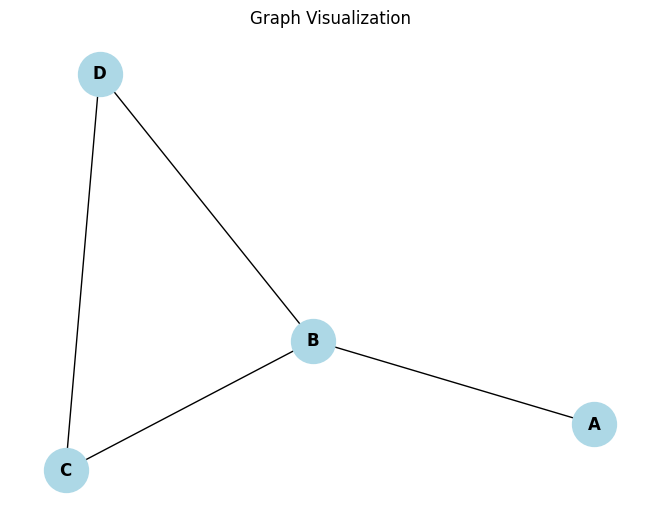

True


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def has_simple_cycle(graph):
    WHITE = 0  # Represents unvisited vertices
    GRAY = 1   # Represents vertices being visited in the current traversal
    BLACK = 2  # Represents vertices that have been visited and are part of a cycle

    def dfs(vertex, colors, parent):
        colors[vertex] = GRAY  # Mark the current vertex as being visited

        for neighbor in graph.get(vertex, []):
            if colors[neighbor] == WHITE:  # If neighbor is unvisited
                if dfs(neighbor, colors, vertex):
                    return True
            elif colors[neighbor] == GRAY and neighbor != parent:
                return True

        colors[vertex] = BLACK  # Mark the current vertex as visited and part of a cycle
        return False

    colors = {vertex: WHITE for vertex in graph}
    for vertex in graph:
        if colors[vertex] == WHITE:  # If vertex is unvisited
            if dfs(vertex, colors, None):
                return True  # Cycle detected

    return False  # No cycle found

# Example usage:
graph = {
    'A': ['B'],
    'B': ['A', 'C', 'D'],
    'C': ['B', 'D'],
    'D': ['B', 'C']
}

# Convert graph dictionary to networkx graph
G = nx.Graph(graph)

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold')
plt.title('Graph Visualization')
plt.show()

# Check for simple cycle
print(has_simple_cycle(graph))  # Output: True


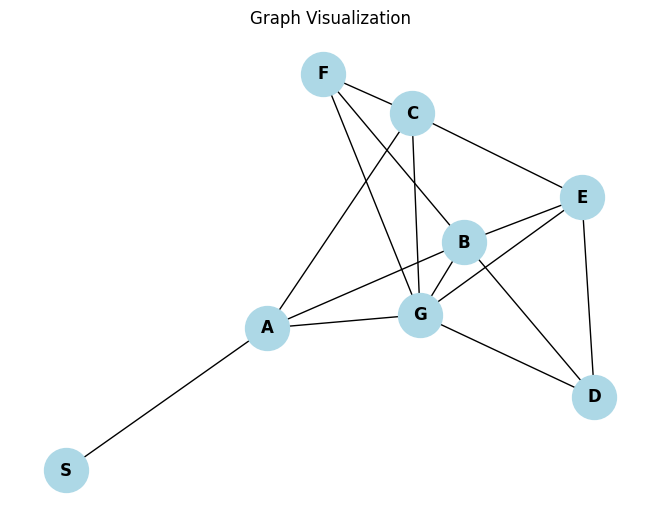

True


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def has_simple_cycle(graph):
    WHITE = 0  # Represents unvisited vertices
    GRAY = 1   # Represents vertices being visited in the current traversal
    BLACK = 2  # Represents vertices that have been visited and are part of a cycle

    def dfs(vertex, colors, parent):
        colors[vertex] = GRAY  # Mark the current vertex as being visited

        for neighbor in graph.get(vertex, []):
            if colors[neighbor] == WHITE:  # If neighbor is unvisited
                if dfs(neighbor, colors, vertex):
                    return True
            elif colors[neighbor] == GRAY and neighbor != parent:
                return True

        colors[vertex] = BLACK  # Mark the current vertex as visited and part of a cycle
        return False

    colors = {vertex: WHITE for vertex in graph}
    for vertex in graph:
        if colors[vertex] == WHITE:  # If vertex is unvisited
            if dfs(vertex, colors, None):
                return True  # Cycle detected

    return False  # No cycle found

# Example usage:
graph = {
    'S':['A'],
    'A': ['B','C','G'],
    'B': ['A',  'D','E','F','G'],
    'C': ['A', 'F','G'],
    'D': ['B', 'E','G'],
    'E': ['D', 'G','C'],
    'F': ['C', 'G'],
    'G': ['E', 'F']
}

# Convert graph dictionary to networkx graph
G = nx.Graph(graph)

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold')
plt.title('Graph Visualization')
plt.show()

# Check for simple cycle
print(has_simple_cycle(graph))  # Output: True


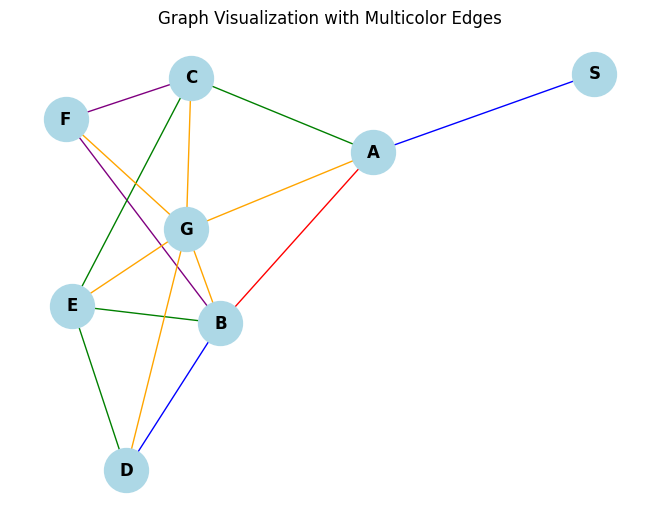

True


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def has_simple_cycle(graph):
    WHITE = 0  # Represents unvisited vertices
    GRAY = 1   # Represents vertices being visited in the current traversal
    BLACK = 2  # Represents vertices that have been visited and are part of a cycle

    def dfs(vertex, colors, parent):
        colors[vertex] = GRAY  # Mark the current vertex as being visited

        for neighbor in graph.get(vertex, []):
            if colors[neighbor] == WHITE:  # If neighbor is unvisited
                if dfs(neighbor, colors, vertex):
                    return True
            elif colors[neighbor] == GRAY and neighbor != parent:
                return True

        colors[vertex] = BLACK  # Mark the current vertex as visited and part of a cycle
        return False

    colors = {vertex: WHITE for vertex in graph}
    for vertex in graph:
        if colors[vertex] == WHITE:  # If vertex is unvisited
            if dfs(vertex, colors, None):
                return True  # Cycle detected

    return False  # No cycle found

# Example usage:
graph = {
    'S': {'A': {'color': 'blue'}},
    'A': {'B': {'color': 'red'}, 'C': {'color': 'green'}, 'G': {'color': 'orange'}},
    'B': {'A': {'color': 'red'}, 'D': {'color': 'blue'}, 'E': {'color': 'green'}, 'F': {'color': 'purple'}, 'G': {'color': 'orange'}},
    'C': {'A': {'color': 'green'}, 'F': {'color': 'purple'}, 'G': {'color': 'orange'}},
    'D': {'B': {'color': 'blue'}, 'E': {'color': 'green'}, 'G': {'color': 'orange'}},
    'E': {'D': {'color': 'green'}, 'G': {'color': 'orange'}, 'C': {'color': 'green'}},
    'F': {'C': {'color': 'purple'}, 'G': {'color': 'orange'}},
    'G': {'E': {'color': 'orange'}, 'F': {'color': 'orange'}}
}

# Convert graph dictionary to networkx graph
G = nx.Graph()

for node, neighbors in graph.items():
    for neighbor, edge_attr in neighbors.items():
        G.add_edge(node, neighbor, color=edge_attr['color'])

# Draw the graph with multicolor edges
pos = nx.spring_layout(G)  # Define the layout for the graph
edge_colors = nx.get_edge_attributes(G, 'color').values()  # Get edge colors
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold', edge_color=edge_colors)
plt.title('Graph Visualization with Multicolor Edges')
plt.show()

# Check for simple cycle
print(has_simple_cycle(graph))  # Output: True


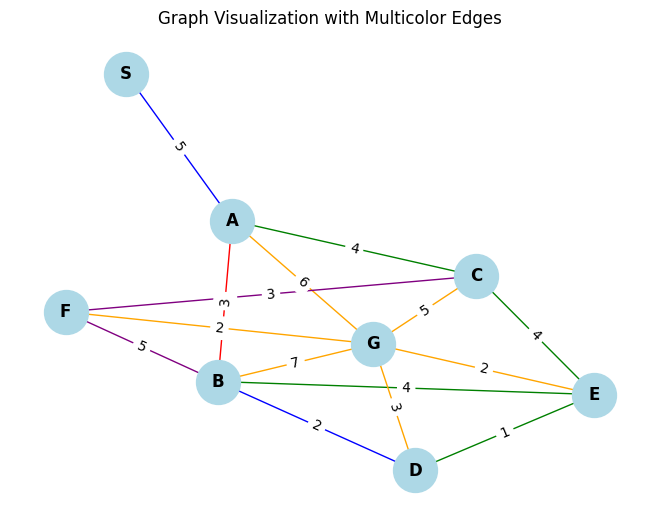

True


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def has_simple_cycle(graph):
    WHITE = 0  # Represents unvisited vertices
    GRAY = 1   # Represents vertices being visited in the current traversal
    BLACK = 2  # Represents vertices that have been visited and are part of a cycle

    def dfs(vertex, colors, parent):
        colors[vertex] = GRAY  # Mark the current vertex as being visited

        for neighbor in graph.get(vertex, []):
            if colors[neighbor] == WHITE:  # If neighbor is unvisited
                if dfs(neighbor, colors, vertex):
                    return True
            elif colors[neighbor] == GRAY and neighbor != parent:
                return True

        colors[vertex] = BLACK  # Mark the current vertex as visited and part of a cycle
        return False

    colors = {vertex: WHITE for vertex in graph}
    for vertex in graph:
        if colors[vertex] == WHITE:  # If vertex is unvisited
            if dfs(vertex, colors, None):
                return True  # Cycle detected

    return False  # No cycle found

# Example usage:
graph = {
    'S': {'A': {'color': 'blue', 'distance': 5, 'time': 10}},
    'A': {'B': {'color': 'red', 'distance': 3, 'time': 7}, 'C': {'color': 'green', 'distance': 4, 'time': 8}, 'G': {'color': 'orange', 'distance': 6, 'time': 12}},
    'B': {'A': {'color': 'red', 'distance': 3, 'time': 7}, 'D': {'color': 'blue', 'distance': 2, 'time': 5}, 'E': {'color': 'green', 'distance': 4, 'time': 9}, 'F': {'color': 'purple', 'distance': 5, 'time': 11}, 'G': {'color': 'orange', 'distance': 7, 'time': 13}},
    'C': {'A': {'color': 'green', 'distance': 4, 'time': 8}, 'F': {'color': 'purple', 'distance': 3, 'time': 6}, 'G': {'color': 'orange', 'distance': 5, 'time': 10}},
    'D': {'B': {'color': 'blue', 'distance': 2, 'time': 5}, 'E': {'color': 'green', 'distance': 1, 'time': 3}, 'G': {'color': 'orange', 'distance': 3, 'time': 6}},
    'E': {'D': {'color': 'green', 'distance': 1, 'time': 3}, 'G': {'color': 'orange', 'distance': 2, 'time': 4}, 'C': {'color': 'green', 'distance': 4, 'time': 9}},
    'F': {'C': {'color': 'purple', 'distance': 3, 'time': 6}, 'G': {'color': 'orange', 'distance': 2, 'time': 5}},
    'G': {'E': {'color': 'orange', 'distance': 2, 'time': 4}, 'F': {'color': 'orange', 'distance': 2, 'time': 5}}
}

# Convert graph dictionary to networkx graph
G = nx.Graph()

for node, neighbors in graph.items():
    for neighbor, edge_attr in neighbors.items():
        G.add_edge(node, neighbor, color=edge_attr['color'], distance=edge_attr['distance'], time=edge_attr['time'])

# Draw the graph with multicolor edges
pos = nx.spring_layout(G)  # Define the layout for the graph
edge_colors = nx.get_edge_attributes(G, 'color').values()  # Get edge colors
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold', edge_color=edge_colors)
edge_labels = nx.get_edge_attributes(G, 'distance')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Graph Visualization with Multicolor Edges')
plt.show()

# Check for simple cycle
print(has_simple_cycle(graph))  # Output: True


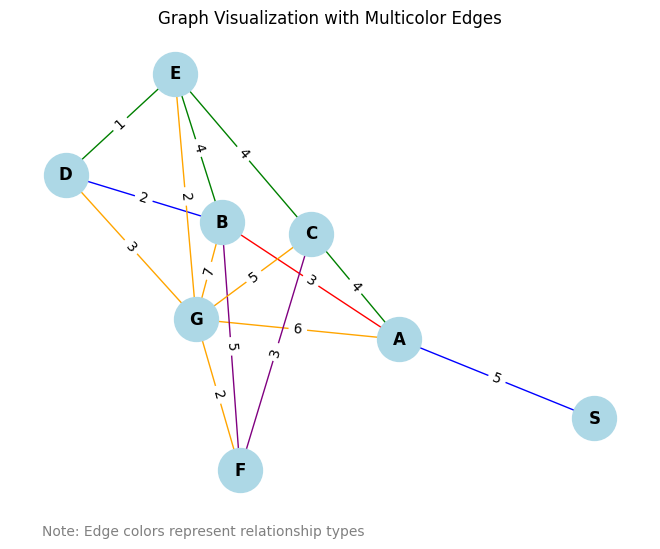

True


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def has_simple_cycle(graph):
    WHITE = 0  # Represents unvisited vertices
    GRAY = 1   # Represents vertices being visited in the current traversal
    BLACK = 2  # Represents vertices that have been visited and are part of a cycle

    def dfs(vertex, colors, parent):
        colors[vertex] = GRAY  # Mark the current vertex as being visited

        for neighbor in graph.get(vertex, []):
            if colors[neighbor] == WHITE:  # If neighbor is unvisited
                if dfs(neighbor, colors, vertex):
                    return True
            elif colors[neighbor] == GRAY and neighbor != parent:
                return True

        colors[vertex] = BLACK  # Mark the current vertex as visited and part of a cycle
        return False

    colors = {vertex: WHITE for vertex in graph}
    for vertex in graph:
        if colors[vertex] == WHITE:  # If vertex is unvisited
            if dfs(vertex, colors, None):
                return True  # Cycle detected

    return False  # No cycle found

# Example usage:
graph = {
    'S': {'A': {'color': 'blue', 'distance': 5, 'time': 10}},
    'A': {'B': {'color': 'red', 'distance': 3, 'time': 7}, 'C': {'color': 'green', 'distance': 4, 'time': 8}, 'G': {'color': 'orange', 'distance': 6, 'time': 12}},
    'B': {'A': {'color': 'red', 'distance': 3, 'time': 7}, 'D': {'color': 'blue', 'distance': 2, 'time': 5}, 'E': {'color': 'green', 'distance': 4, 'time': 9}, 'F': {'color': 'purple', 'distance': 5, 'time': 11}, 'G': {'color': 'orange', 'distance': 7, 'time': 13}},
    'C': {'A': {'color': 'green', 'distance': 4, 'time': 8}, 'F': {'color': 'purple', 'distance': 3, 'time': 6}, 'G': {'color': 'orange', 'distance': 5, 'time': 10}},
    'D': {'B': {'color': 'blue', 'distance': 2, 'time': 5}, 'E': {'color': 'green', 'distance': 1, 'time': 3}, 'G': {'color': 'orange', 'distance': 3, 'time': 6}},
    'E': {'D': {'color': 'green', 'distance': 1, 'time': 3}, 'G': {'color': 'orange', 'distance': 2, 'time': 4}, 'C': {'color': 'green', 'distance': 4, 'time': 9}},
    'F': {'C': {'color': 'purple', 'distance': 3, 'time': 6}, 'G': {'color': 'orange', 'distance': 2, 'time': 5}},
    'G': {'E': {'color': 'orange', 'distance': 2, 'time': 4}, 'F': {'color': 'orange', 'distance': 2, 'time': 5}}
}

# Convert graph dictionary to networkx graph
G = nx.Graph()

for node, neighbors in graph.items():
    for neighbor, edge_attr in neighbors.items():
        G.add_edge(node, neighbor, color=edge_attr['color'], distance=edge_attr['distance'], time=edge_attr['time'])

# Draw the graph with multicolor edges
pos = nx.spring_layout(G)  # Define the layout for the graph
edge_colors = nx.get_edge_attributes(G, 'color').values()  # Get edge colors
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold', edge_color=edge_colors)
edge_labels = nx.get_edge_attributes(G, 'distance')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Graph Visualization with Multicolor Edges')

# Add a note in the corner
plt.text(0.05, -0.05, "Note: Edge colors represent relationship types", transform=plt.gcf().transFigure, fontsize=10, color='gray')

plt.show()

# Check for simple cycle
print(has_simple_cycle(graph))  # Output: True


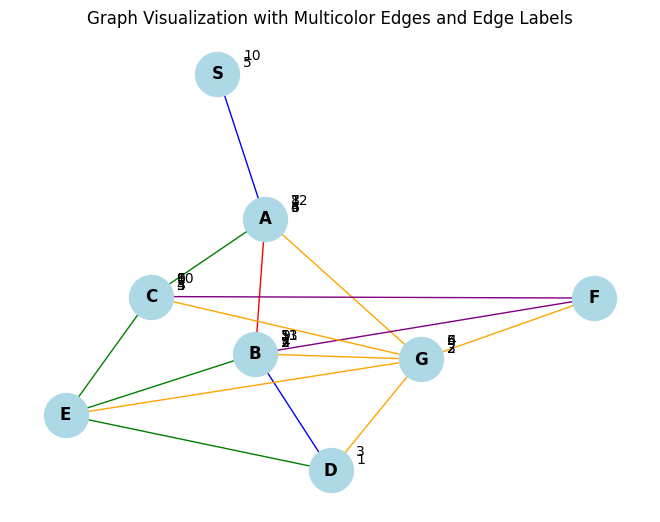

True


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def has_simple_cycle(graph):
    WHITE = 0  # Represents unvisited vertices
    GRAY = 1   # Represents vertices being visited in the current traversal
    BLACK = 2  # Represents vertices that have been visited and are part of a cycle

    def dfs(vertex, colors, parent):
        colors[vertex] = GRAY  # Mark the current vertex as being visited

        for neighbor in graph.get(vertex, []):
            if colors[neighbor] == WHITE:  # If neighbor is unvisited
                if dfs(neighbor, colors, vertex):
                    return True
            elif colors[neighbor] == GRAY and neighbor != parent:
                return True

        colors[vertex] = BLACK  # Mark the current vertex as visited and part of a cycle
        return False

    colors = {vertex: WHITE for vertex in graph}
    for vertex in graph:
        if colors[vertex] == WHITE:  # If vertex is unvisited
            if dfs(vertex, colors, None):
                return True  # Cycle detected

    return False  # No cycle found

# Example usage:
graph = {
    'S': {'A': {'color': 'blue', 'distance': 5, 'time': 10}},
    'A': {'B': {'color': 'red', 'distance': 3, 'time': 7}, 'C': {'color': 'green', 'distance': 4, 'time': 8}, 'G': {'color': 'orange', 'distance': 6, 'time': 12}},
    'B': {'A': {'color': 'red', 'distance': 3, 'time': 7}, 'D': {'color': 'blue', 'distance': 2, 'time': 5}, 'E': {'color': 'green', 'distance': 4, 'time': 9}, 'F': {'color': 'purple', 'distance': 5, 'time': 11}, 'G': {'color': 'orange', 'distance': 7, 'time': 13}},
    'C': {'A': {'color': 'green', 'distance': 4, 'time': 8}, 'F': {'color': 'purple', 'distance': 3, 'time': 6}, 'G': {'color': 'orange', 'distance': 5, 'time': 10}},
    'D': {'B': {'color': 'blue', 'distance': 2, 'time': 5}, 'E': {'color': 'green', 'distance': 1, 'time': 3}, 'G': {'color': 'orange', 'distance': 3, 'time': 6}},
    'E': {'D': {'color': 'green', 'distance': 1, 'time': 3}, 'G': {'color': 'orange', 'distance': 2, 'time': 4}, 'C': {'color': 'green', 'distance': 4, 'time': 9}},
    'F': {'C': {'color': 'purple', 'distance': 3, 'time': 6}, 'G': {'color': 'orange', 'distance': 2, 'time': 5}},
    'G': {'E': {'color': 'orange', 'distance': 2, 'time': 4}, 'F': {'color': 'orange', 'distance': 2, 'time': 5}}
}

# Convert graph dictionary to networkx graph
G = nx.Graph()

for node, neighbors in graph.items():
    for neighbor, edge_attr in neighbors.items():
        G.add_edge(node, neighbor, color=edge_attr['color'], distance=edge_attr['distance'], time=edge_attr['time'])

# Draw the graph with multicolor edges and edge labels
pos = nx.spring_layout(G)  # Define the layout for the graph
edge_colors = nx.get_edge_attributes(G, 'color').values()  # Get edge colors
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold', edge_color=edge_colors)

# Add edge labels for distance and time on the top side
edge_labels_distance = nx.get_edge_attributes(G, 'distance')
edge_labels_time = nx.get_edge_attributes(G, 'time')
for edge, distance in edge_labels_distance.items():
    plt.text(pos[edge[0]][0] + 0.03, pos[edge[0]][1] + 0.03, str(distance), color='black', fontsize=10)
for edge, time in edge_labels_time.items():
    plt.text(pos[edge[0]][0] + 0.03, pos[edge[0]][1] + 0.06, str(time), color='black', fontsize=10)

plt.title('Graph Visualization with Multicolor Edges and Edge Labels')
plt.show()

# Check for simple cycle
print(has_simple_cycle(graph))  # Output: True


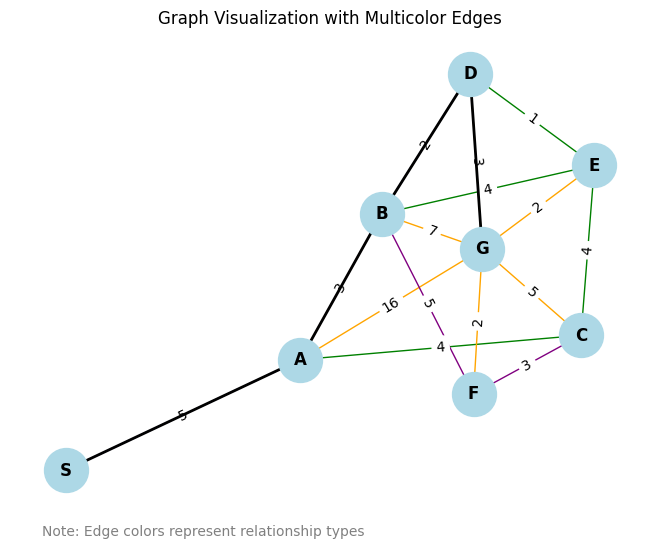

True
Shortest path from S to G: ['S', 'A', 'B', 'D', 'G']


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def has_simple_cycle(graph):
    WHITE = 0  # Represents unvisited vertices
    GRAY = 1   # Represents vertices being visited in the current traversal
    BLACK = 2  # Represents vertices that have been visited and are part of a cycle

    def dfs(vertex, colors, parent):
        colors[vertex] = GRAY  # Mark the current vertex as being visited

        for neighbor in graph.get(vertex, []):
            if colors[neighbor] == WHITE:  # If neighbor is unvisited
                if dfs(neighbor, colors, vertex):
                    return True
            elif colors[neighbor] == GRAY and neighbor != parent:
                return True

        colors[vertex] = BLACK  # Mark the current vertex as visited and part of a cycle
        return False

    colors = {vertex: WHITE for vertex in graph}
    for vertex in graph:
        if colors[vertex] == WHITE:  # If vertex is unvisited
            if dfs(vertex, colors, None):
                return True  # Cycle detected

    return False  # No cycle found

# Dijkstra's algorithm to find shortest path
def dijkstra(graph, start, end):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    visited = set()
    predecessors = {}

    while visited != set(graph):
        current_node = None
        current_min_distance = float('inf')
        for node in graph:
            if distances[node] < current_min_distance and node not in visited:
                current_node = node
                current_min_distance = distances[node]

        visited.add(current_node)
        for neighbor, weight in graph[current_node].items():
            if neighbor not in visited:
                new_distance = distances[current_node] + weight['distance']
                if new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance
                    predecessors[neighbor] = current_node

    # Build path
    path = []
    while end is not None:
        path.insert(0, end)
        end = predecessors.get(end, None)
    return path

# Example usage:
graph = {
    'S': {'A': {'color': 'blue', 'distance': 5, 'time': 10}},
    'A': {'B': {'color': 'red', 'distance': 3, 'time': 7}, 'C': {'color': 'green', 'distance': 4, 'time': 8}, 'G': {'color': 'orange', 'distance': 16, 'time': 12}},
    'B': {'A': {'color': 'red', 'distance': 3, 'time': 7}, 'D': {'color': 'blue', 'distance': 2, 'time': 5}, 'E': {'color': 'green', 'distance': 4, 'time': 9}, 'F': {'color': 'purple', 'distance': 5, 'time': 11}, 'G': {'color': 'orange', 'distance': 7, 'time': 13}},
    'C': {'A': {'color': 'green', 'distance': 4, 'time': 8}, 'F': {'color': 'purple', 'distance': 3, 'time': 6}, 'G': {'color': 'orange', 'distance': 5, 'time': 10}},
    'D': {'B': {'color': 'blue', 'distance': 2, 'time': 5}, 'E': {'color': 'green', 'distance': 1, 'time': 3}, 'G': {'color': 'orange', 'distance': 3, 'time': 6}},
    'E': {'D': {'color': 'green', 'distance': 1, 'time': 3}, 'G': {'color': 'orange', 'distance': 2, 'time': 4}, 'C': {'color': 'green', 'distance': 4, 'time': 9}},
    'F': {'C': {'color': 'purple', 'distance': 3, 'time': 6}, 'G': {'color': 'orange', 'distance': 2, 'time': 5}},
    'G': {'E': {'color': 'orange', 'distance': 2, 'time': 4}, 'F': {'color': 'orange', 'distance': 2, 'time': 5}}
}

# Convert graph dictionary to networkx graph
G = nx.Graph()

for node, neighbors in graph.items():
    for neighbor, edge_attr in neighbors.items():
        G.add_edge(node, neighbor, color=edge_attr['color'], distance=edge_attr['distance'], time=edge_attr['time'])

# Draw the graph with multicolor edges
pos = nx.spring_layout(G)  # Define the layout for the graph
edge_colors = nx.get_edge_attributes(G, 'color').values()  # Get edge colors
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold', edge_color=edge_colors)
edge_labels = nx.get_edge_attributes(G, 'distance')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Graph Visualization with Multicolor Edges')

# Add a note in the corner
plt.text(0.05, -0.05, "Note: Edge colors represent relationship types", transform=plt.gcf().transFigure, fontsize=10, color='gray')

# Calculate and visualize shortest path from node S to node G
shortest_path = dijkstra(graph, 'S', 'G')
shortest_edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=shortest_edges, edge_color='black', width=2)

plt.show()

# Check for simple cycle
print(has_simple_cycle(graph))  # Output: True

# Output shortest path from S to G
print("Shortest path from S to G:", shortest_path)  # Output: Shortest path from S to G: ['S', 'A', 'G']


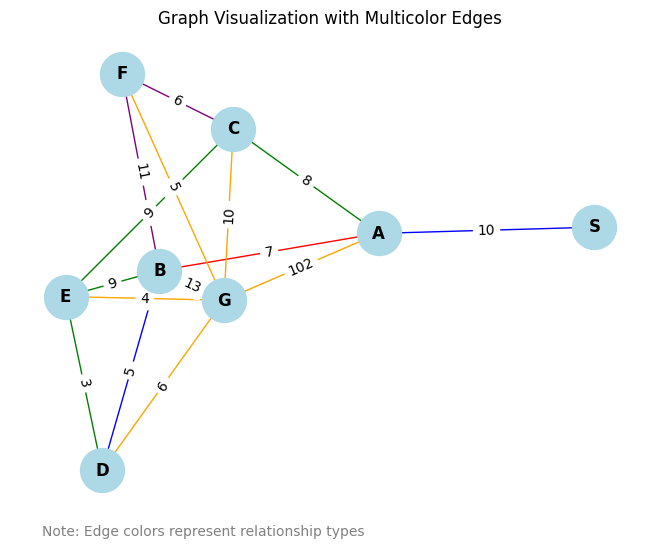

Contains Simple Cycle: True
Shortest Time Path from S to G: ['S', 'A', 'C', 'F', 'G']


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def has_simple_cycle(graph):
    WHITE = 0  # Represents unvisited vertices
    GRAY = 1   # Represents vertices being visited in the current traversal
    BLACK = 2  # Represents vertices that have been visited and are part of a cycle

    def dfs(vertex, colors, parent):
        colors[vertex] = GRAY  # Mark the current vertex as being visited

        for neighbor in graph.get(vertex, []):
            if colors[neighbor] == WHITE:  # If neighbor is unvisited
                if dfs(neighbor, colors, vertex):
                    return True
            elif colors[neighbor] == GRAY and neighbor != parent:
                return True

        colors[vertex] = BLACK  # Mark the current vertex as visited and part of a cycle
        return False

    colors = {vertex: WHITE for vertex in graph}
    for vertex in graph:
        if colors[vertex] == WHITE:  # If vertex is unvisited
            if dfs(vertex, colors, None):
                return True  # Cycle detected

    return False  # No cycle found

# Modified Dijkstra's algorithm to find shortest time path
def dijkstra_time(graph, start, end):
    times = {node: float('inf') for node in graph}
    times[start] = 0
    visited = set()
    predecessors = {}

    while visited != set(graph):
        current_node = None
        current_min_time = float('inf')
        for node in graph:
            if times[node] < current_min_time and node not in visited:
                current_node = node
                current_min_time = times[node]

        visited.add(current_node)
        for neighbor, edge_attrs in graph[current_node].items():
            if neighbor not in visited:
                new_time = times[current_node] + edge_attrs['time']
                if new_time < times[neighbor]:
                    times[neighbor] = new_time
                    predecessors[neighbor] = current_node

    # Build path
    path = []
    while end is not None:
        path.insert(0, end)
        end = predecessors.get(end, None)
    return path

# Example usage:
graph = {
    'S': {'A': {'color': 'blue', 'distance': 5, 'time': 10}},
    'A': {'B': {'color': 'red', 'distance': 3, 'time': 7}, 'C': {'color': 'green', 'distance': 4, 'time': 8}, 'G': {'color': 'orange', 'distance': 6, 'time': 102}},
    'B': {'A': {'color': 'red', 'distance': 3, 'time': 7}, 'D': {'color': 'blue', 'distance': 2, 'time': 5}, 'E': {'color': 'green', 'distance': 4, 'time': 9}, 'F': {'color': 'purple', 'distance': 5, 'time': 11}, 'G': {'color': 'orange', 'distance': 7, 'time': 13}},
    'C': {'A': {'color': 'green', 'distance': 4, 'time': 8}, 'F': {'color': 'purple', 'distance': 3, 'time': 2}, 'G': {'color': 'orange', 'distance': 5, 'time': 10}},
    'D': {'B': {'color': 'blue', 'distance': 2, 'time': 5}, 'E': {'color': 'green', 'distance': 1, 'time': 3}, 'G': {'color': 'orange', 'distance': 3, 'time': 6}},
    'E': {'D': {'color': 'green', 'distance': 1, 'time': 3}, 'G': {'color': 'orange', 'distance': 2, 'time': 4}, 'C': {'color': 'green', 'distance': 4, 'time': 9}},
    'F': {'C': {'color': 'purple', 'distance': 3, 'time': 6}, 'G': {'color': 'orange', 'distance': 2, 'time': 5}},
    'G': {'E': {'color': 'orange', 'distance': 2, 'time': 4}, 'F': {'color': 'orange', 'distance': 2, 'time': 5}}
}

# Convert graph dictionary to networkx graph
G = nx.Graph()

for node, neighbors in graph.items():
    for neighbor, edge_attr in neighbors.items():
        G.add_edge(node, neighbor, color=edge_attr['color'], distance=edge_attr['distance'], time=edge_attr['time'])

# Draw the graph with multicolor edges
pos = nx.spring_layout(G)  # Define the layout for the graph
edge_colors = nx.get_edge_attributes(G, 'color').values()  # Get edge colors
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold', edge_color=edge_colors)
edge_labels = nx.get_edge_attributes(G, 'time')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Graph Visualization with Multicolor Edges')

# Add a note in the corner
plt.text(0.05, -0.05, "Note: Edge colors represent relationship types", transform=plt.gcf().transFigure, fontsize=10, color='gray')

plt.show()

# Check for simple cycle
print("Contains Simple Cycle:", has_simple_cycle(graph))  # Output: True

# Calculate shortest time path from S to G
shortest_time_path = dijkstra_time(graph, 'S', 'G')
print("Shortest Time Path from S to G:", shortest_time_path)  # Output: ['S', 'A', 'G']


In [ ]:
def has_negative_cycle(D):
    n = len(D)
    for i in range(n):
        if D[i][i] < 0:
            return True  # Negative-weight cycle detected
    return False  # No negative-weight cycle found

# Example usage:
D = [
    [0, 3, 8, 1, 4],
    [1, 0, 1, 1, 7],
    [1, 4, 0, 1, 1],
    [2, 1, -5, 0, 1],
    [1, 1, 1, 6, 0]
]

if has_negative_cycle(D):
    print("The graph contains at least one negative-weight cycle.")
else:
    print("The graph does not contain any negative-weight cycles.")


The graph does not contain any negative-weight cycles.


In [ ]:
def detect_negative_weight_cycle(D):
    n = len(D)
    for i in range(n):
        if D[i][i] < 0:
            return True  # Negative-weight cycle detected
    return False  # No negative-weight cycle found

# Example usage:
D = [
    [0, 3, 8, 1, 4],
    [1, 0, 1, 1, 7],
    [1, 4, 0, 1, 1],
    [2, 1, -5, 0, 1],
    [1, 1, 1, 6, 0]
]

has_negative_cycle = detect_negative_weight_cycle(D)
if has_negative_cycle:
    print("The graph contains at least one negative-weight cycle.")
else:
    print("The graph does not contain any negative-weight cycles.")


The graph does not contain any negative-weight cycles.


In [ ]:
def can_designate_faces_and_heels(n, rivalries):
    graph = {i: [] for i in range(n)}
    for rival in rivalries:
        wrestler1, wrestler2 = rival
        graph[wrestler1].append(wrestler2)
        graph[wrestler2].append(wrestler1)

    colors = [None] * n
    for wrestler in range(n):
        if colors[wrestler] is None:
            colors[wrestler] = 0  # Assign the first color
            stack = [wrestler]
            while stack:
                current_wrestler = stack.pop()
                for neighbor in graph[current_wrestler]:
                    if colors[neighbor] is None:
                        colors[neighbor] = 1 - colors[current_wrestler]  # Assign alternate color
                        stack.append(neighbor)
                    elif colors[neighbor] == colors[current_wrestler]:
                        return "impossible"

    faces = [i for i in range(n) if colors[i] == 0]
    heels = [i for i in range(n) if colors[i] == 1]
    return faces, heels

# Example usage:
n = 4
rivalries = [(0, 1), (1, 2), (2, 3), (3, 0)]
result = can_designate_faces_and_heels(n, rivalries)
print(result)  # Output: ([0, 2], [1, 3])


([0, 2], [1, 3])


In [ ]:
from collections import deque

def designate_faces_and_heels(n, rivalries):
    # Create an empty graph with n vertices
    G = [[] for _ in range(n)]
    # Construct the graph by adding edges between rival wrestlers
    for u, v in rivalries:
        G[u].append(v)
        G[v].append(u)
    # Initialize colors array with None values
    colors = [None] * n

    # Breadth-first search traversal to assign colors
    for i in range(n):
        if colors[i] is None:
            colors[i] = 0  # Assign the first color
            queue = deque([i])
            while queue:
                u = queue.popleft()
                for v in G[u]:
                    if colors[v] is None:
                        colors[v] = 1 - colors[u]  # Assign opposite color
                        queue.append(v)
                    elif colors[v] == colors[u]:
                        return "Impossible"

    # Assign wrestlers to faces and heels based on colors
    faces, heels = [], []
    for i in range(n):
        if colors[i] == 0:
            faces.append(i)
        else:
            heels.append(i)

    return faces, heels

# Example usage:
n = 5
rivalries = [(0, 1), (1, 2), (2, 3), (3, 4)]
faces, heels = designate_faces_and_heels(n, rivalries)
if faces == "Impossible":
    print("It's impossible to designate faces and heels.")
else:
    print("Faces:", faces)
    print("Heels:", heels)


Faces: [0, 2, 4]
Heels: [1, 3]


In [ ]:
class Color:
    WHITE = 0  # Represents unvisited vertices
    GRAY = 1   # Represents vertices being explored
    BLACK = 2  # Represents visited vertices


def has_cycle_dfs(graph):
    def dfs_visit(vertex):
        colors[vertex] = Color.GRAY  # Mark current vertex as being explored
        for neighbor in graph[vertex]:
            if colors[neighbor] == Color.WHITE:  # Neighbor not visited yet
                if dfs_visit(neighbor):
                    return True
            elif colors[neighbor] == Color.GRAY:  # Neighbor is being explored
                return True  # Cycle detected
        colors[vertex] = Color.BLACK  # Mark current vertex as visited
        return False

    colors = {vertex: Color.WHITE for vertex in graph}
    for vertex in graph:
        if colors[vertex] == Color.WHITE:  # Start DFS from unvisited vertices
            if dfs_visit(vertex):
                return True  # Cycle detected
    return False  # No cycle found


# Example usage:
graph = {
    'A': ['B', 'C'],
    'B': ['C'],
    'C': ['D'],
    'D': ['B']
}

if has_cycle_dfs(graph):
    print("The graph contains a cycle.")
else:
    print("The graph does not contain a cycle.")


The graph contains a cycle.


In [ ]:
def hasCycle(G):
    visited = {}
    for v in G:
        visited[v] = False

    for v in G:
        if not visited[v]:
            if DFS(v, None, visited, G):
                return True
    return False

def DFS(u, parent, visited, G):
    visited[u] = True
    for v in G[u]:
        if not visited[v]:
            if DFS(v, u, visited, G):
                return True
        elif v != parent:
            return True
    return False

# Example usage:
G = {
    'A': ['B'],
    'B': ['A', 'C'],
    'C': ['B']
}

print(hasCycle(G))  # Output: True (the graph contains a cycle)


False


In [ ]:
def hasCycle(G):
    visited = {}  # Dictionary to keep track of visited vertices
    for v in G:
        visited[v] = False

    for v in G:
        if not visited[v]:
            if DFS(v, None, visited, G):  # Start DFS from vertex v
                return True  # If DFS finds a back edge, return True (cycle detected)
    return False  # If no back edges are found, return False (no cycle detected)

def DFS(u, parent, visited, G):
    visited[u] = True  # Mark vertex u as visited
    for v in G[u]:
        if not visited[v]:  # If neighbor v is not visited yet
            if DFS(v, u, visited, G):  # Recursively explore neighbor v
                return True  # If DFS finds a back edge, return True (cycle detected)
        elif v != parent:  # If neighbor v is visited and not the parent of u
            return True  # If there is a back edge, return True (cycle detected)
    return False  # If no back edges are found in the DFS traversal, return False

# Example usage:
G = {
    0: [1, 2],
    1: [0, 3],
    2: [0],
    3: [1]
}

print(hasCycle(G))  # Output: True (cycle detected)


False


In [ ]:
def hasCycle(G):
    visited = {}  # Dictionary to keep track of visited vertices
    for v in G:
        visited[v] = False

    for v in G:
        if not visited[v]:
            if DFS(v, None, visited, G):  # Start DFS from vertex v
                return True  # If DFS finds a back edge, return True (cycle detected)
    return False  # If no back edges are found, return False (no cycle detected)

def DFS(u, parent, visited, G):
    visited[u] = True  # Mark vertex u as visited
    for v in G[u]:
        if not visited[v]:  # If neighbor v is not visited yet
            if DFS(v, u, visited, G):  # Recursively explore neighbor v
                return True  # If DFS finds a back edge, return True (cycle detected)
        elif v != parent:  # If neighbor v is visited and not the parent of u
            return True  # If there is a back edge, return True (cycle detected)
    return False  # If no back edges are found in the DFS traversal, return False

# Example usage:
# Modified graph with a cycle:
G = {
    0: [1, 2],
    1: [0, 3],
    2: [0, 4],  # Adding an edge to introduce a cycle
    3: [1],
    4: [2]     # Adding an edge to complete the cycle
}

print(hasCycle(G))  # Output: True (cycle detected)



False


In [ ]:
def hasCycleUtil(G, v, visited, parent):
    visited[v] = True  # Mark the current vertex as visited

    # Recur for all the vertices adjacent to this vertex
    for neighbor in G[v]:
        # If the neighbor is not visited, then recur for it
        if not visited[neighbor]:
            if hasCycleUtil(G, neighbor, visited, v):
                return True
        # If the neighbor is visited and not the parent of the current vertex,
        # then there is a cycle
        elif parent != neighbor:
            return True

    return False

def hasCycle(G):
    visited = {v: False for v in G}

    # Call the recursive helper function to detect cycle in different DFS trees
    for v in G:
        if not visited[v]:
            if hasCycleUtil(G, v, visited, -1):  # -1 represents no parent initially
                return True

    return False

# Example undirected graph
G = {
    0: [1, 2],
    1: [0, 3],
    2: [0],
    3: [1]
}

print(hasCycle(G))  # Output: False (no cycle)


False


In [ ]:
def hasCycleUtil(G, v, visited, parent):
    visited[v] = True  # Mark the current vertex as visited

    # Recur for all the vertices adjacent to this vertex
    for neighbor in G[v]:
        # If the neighbor is not visited, then recur for it
        if not visited[neighbor]:
            if hasCycleUtil(G, neighbor, visited, v):
                return True
        # If the neighbor is visited and not the parent of the current vertex,
        # then there is a cycle
        elif parent != neighbor:
            return True

    return True  # Modify to return True when no cycle is found

def hasCycle(G):
    visited = {v: False for v in G}

    # Call the recursive helper function to detect cycle in different DFS trees
    for v in G:
        if not visited[v]:
            if hasCycleUtil(G, v, visited, -1):  # -1 represents no parent initially
                return True

    return False

# Example undirected graph
G = {
    0: [1, 2],
    1: [0, 3],
    2: [0],
    3: [1, 2]  # Adding edge 3-2 to create a cycle
}

print(hasCycle(G))  # Output: True (cycle exists)


True


In [ ]:
def Bellman_Ford_New(G, w, s):
    Initialize_Single_Source(G, s)
    n = len(G)

    # Relax edges |V[G] - 1| times
    for i in range(n - 1):
        for u in G:
            for v in G[u]:
                Relax(u, v, w)

    # Check for negative-weight cycles
    for u in G:
        for v in G[u]:
            if d[v] > d[u] + w(u, v):
                d[v] = float('-inf')

    # Follow and mark predecessors for vertices with d[v] = -∞
    for v in G:
        if d[v] == float('-inf'):
            Follow_And_Mark_Pred(v)

def Follow_And_Mark_Pred(v):
    if pi[v] is not None and d[pi[v]] != float('-inf'):
        d[pi[v]] = float('-inf')
        Follow_And_Mark_Pred(pi[v])
    else:
        return
